<a href="https://colab.research.google.com/github/Chinothebuilder/HAM10000/blob/main/SSID_2183141_Neural_Computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Human Against Machine with 10000 Training Images: Dermatoscopic Image Analysis using Convlutional Neural Networks**


## **Download the Dataset**

In [ ]:
import os 
import requests
import zipfile

In [ ]:
os.getcwd()

'/content'

In [ ]:
#Import the libraries
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)
import pandas as pd
import glob, cv2
import numpy as np
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [ ]:
#Import Libraries 
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import keras
from keras import backend as K
from keras import layers
from keras.layers.core import Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.getcwd()

'/content'

In [ ]:
os.listdir()

['.config', 'drive', 'sample_data']

## **Perform Exploratory data analysis and visualization on the dataset**

### **Read the metadata csv file**

In [ ]:
# Read the HAM10000 metadata 
df = pd.read_csv("/content/drive/MyDrive/HAM10000_metadata")

### **Basic Statistical Understanding of the DataBasic Statistical Understanding of the Data**

In [ ]:
#Read the first 10 information in the dataset 
df.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear,vidir_modern
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,vidir_modern
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,vidir_modern
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,vidir_modern
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back,vidir_modern


In [ ]:
# Get the total number of rows and colums in dataset 
df.shape

(10015, 8)

In [ ]:
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


### **Missing Values**

In [ ]:
# Get the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB


In [ ]:
# Get the quantity amount of null values in the "age" column
df['age'].isna().sum()

57

It can be seen that there are 9958 non-null count for the "age" variable. Meaning have 57 (10015 - 9958) null value inputs in total

There are 57 null values in 'age'. that is 57/10015 = 0.00569 (0.5%) This is quite a small %, we can either remove it or replace it with some values. Here, we will be replacing it with the mean value

In [ ]:
# View the rows and columns presentation or the null values on the age column
df[df["age"].isna()]

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
968,HAM_0001186,ISIC_0033391,bkl,consensus,NaN,unknown,unknown,vidir_modern
969,HAM_0002660,ISIC_0033750,bkl,consensus,NaN,unknown,unknown,vidir_modern
970,HAM_0000372,ISIC_0033685,bkl,consensus,NaN,unknown,unknown,vidir_modern
971,HAM_0000948,ISIC_0033631,bkl,consensus,NaN,unknown,unknown,vidir_modern
972,HAM_0000983,ISIC_0033490,bkl,consensus,NaN,unknown,unknown,vidir_modern
973,HAM_0007281,ISIC_0034283,bkl,consensus,NaN,unknown,unknown,vidir_modern
974,HAM_0001561,ISIC_0032740,bkl,consensus,NaN,unknown,unknown,vidir_modern
975,HAM_0000825,ISIC_0034186,bkl,consensus,NaN,unknown,unknown,vidir_modern
977,HAM_0006074,ISIC_0034252,bkl,consensus,NaN,unknown,unknown,vidir_modern
978,HAM_0006074,ISIC_0033829,bkl,consensus,NaN,unknown,unknown,vidir_modern


In [ ]:
# Fill the missing value with the mean value of the age 
df['age'].fillna(df['age'].mean(), inplace = True)

In [ ]:
# Get the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB


### **Exploratory Data Analysis**

Here, we try to obtain graphical representation of some of the key elements in your data in general.

#### **Univariate analysis**

Before we can proceed with our analysis we need to get a proper understanding of our data and how they are distributed in our dataset. we try to analyse One variable at a time.

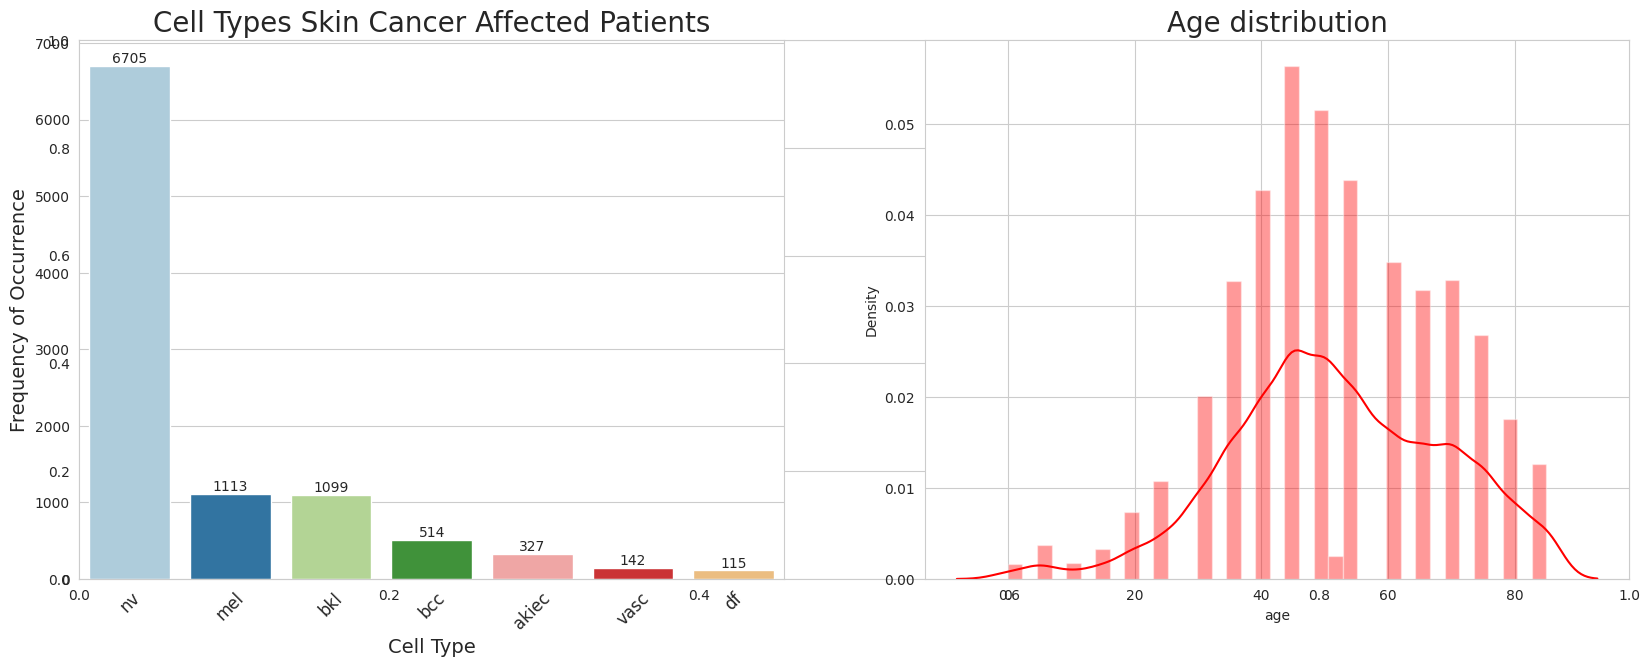

In [ ]:
# Set Seaborn style
sns.set_style('whitegrid')

# Cell Types Skin Cancer Affected Patients
fig, axes = plt.subplots(figsize=(20, 7))
ax1 = fig.add_subplot(121)
ax1 = sns.countplot(x='dx', data=df, order=df['dx'].value_counts().index, palette='Paired')
for container in ax1.containers:
    ax1.bar_label(container)
plt.title('Cell Types Skin Cancer Affected Patients', fontsize=20)
plt.xlabel('Cell Type', fontsize=14)
plt.ylabel('Frequency of Occurrence', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

ax4 = fig.add_subplot(122)
sample_age = df['age']
sns.distplot(sample_age, color='red');
plt.title('Age distribution', fontsize=20)
#ax4.set_title('Age')

# Display the plot
plt.show()

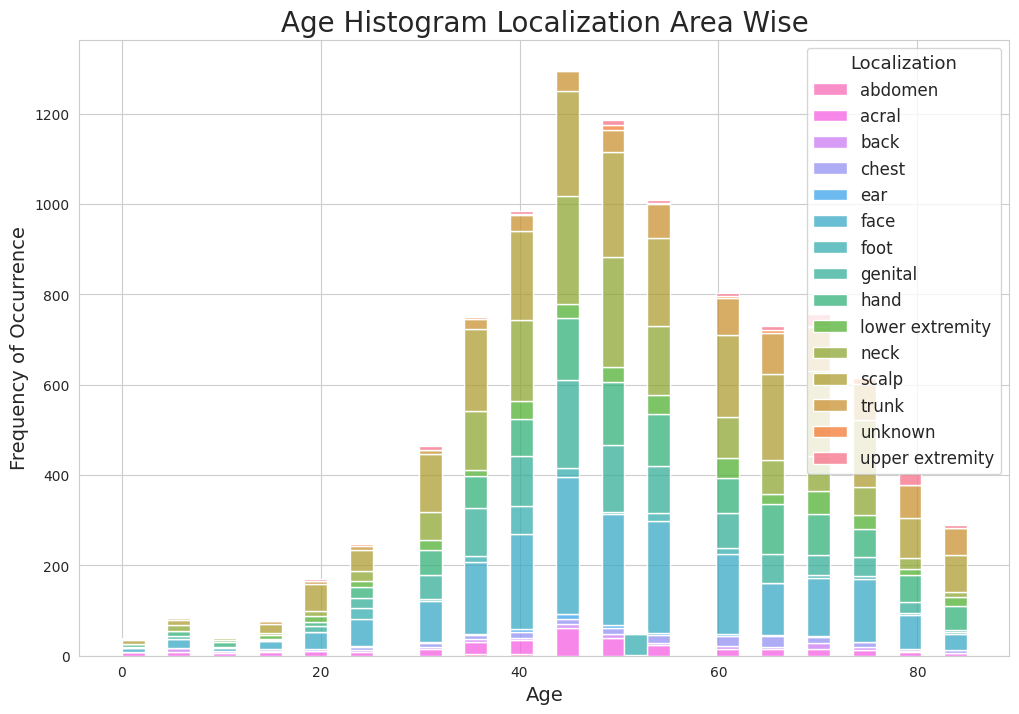

In [ ]:
sns.set_style('whitegrid')

# Age Histogram Localization Area Wise
fig, axes = plt.subplots(figsize=(12, 8))
ax = sns.histplot(data=df, x='age', hue='localization', multiple='stack')

# Add the legend
legend_labels = sorted(df['localization'].unique())
plt.legend(title='Localization', labels=legend_labels, title_fontsize='13', loc='upper right', fontsize='12')

plt.title('Age Histogram Localization Area Wise', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency of Occurrence', fontsize=14)

# Display the plot
plt.show()

Inference:

From the distribution it is evident that there is a severe imbalance in the number of images for each cell type.

*   There are many more images for the lesion type “Melanocytic Nevi” or “nv” (6705 /10015) compared to other types like “dermatofibroma” or “df” (115/10015). 
This is a usual occurrence for medical datasets due to the limited amount of patients. 
This is a perfect example of why it is so important to analyze the data beforehand.
*   The age is positively skewed, which is a good indication that our data is okay.

*   It can also be seen that we have tumor localization mainly on the back and at the lower extremities, while we have the leas occurence on the acral and genital regions of the body.
*   Also, the sex of the patients shows we have more male in our dataset while a very few didn't indicate their sex


In [ ]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [ ]:
df_new = df.iloc[:,[2, 6]]

In [ ]:
rafa = df_new.groupby("localization").value_counts().reset_index()

In [ ]:
# Rename the dataframe column
rafa = rafa.rename(columns={0: "count"})

In [ ]:
# Get the data fram for the count of each lesion type, localization
nv = rafa[rafa["dx"] == "nv"]
mel = rafa[rafa["dx"] == "mel"]
bkl = rafa[rafa["dx"] == "bkl"]
vasc = rafa[rafa["dx"] == "vasc"]
bcc = rafa[rafa["dx"] == "bcc"]
akiec = rafa[rafa["dx"] == "akiec"]
dfi = rafa[rafa["dx"] == "df"]

#### **Multi-variate Analysis**

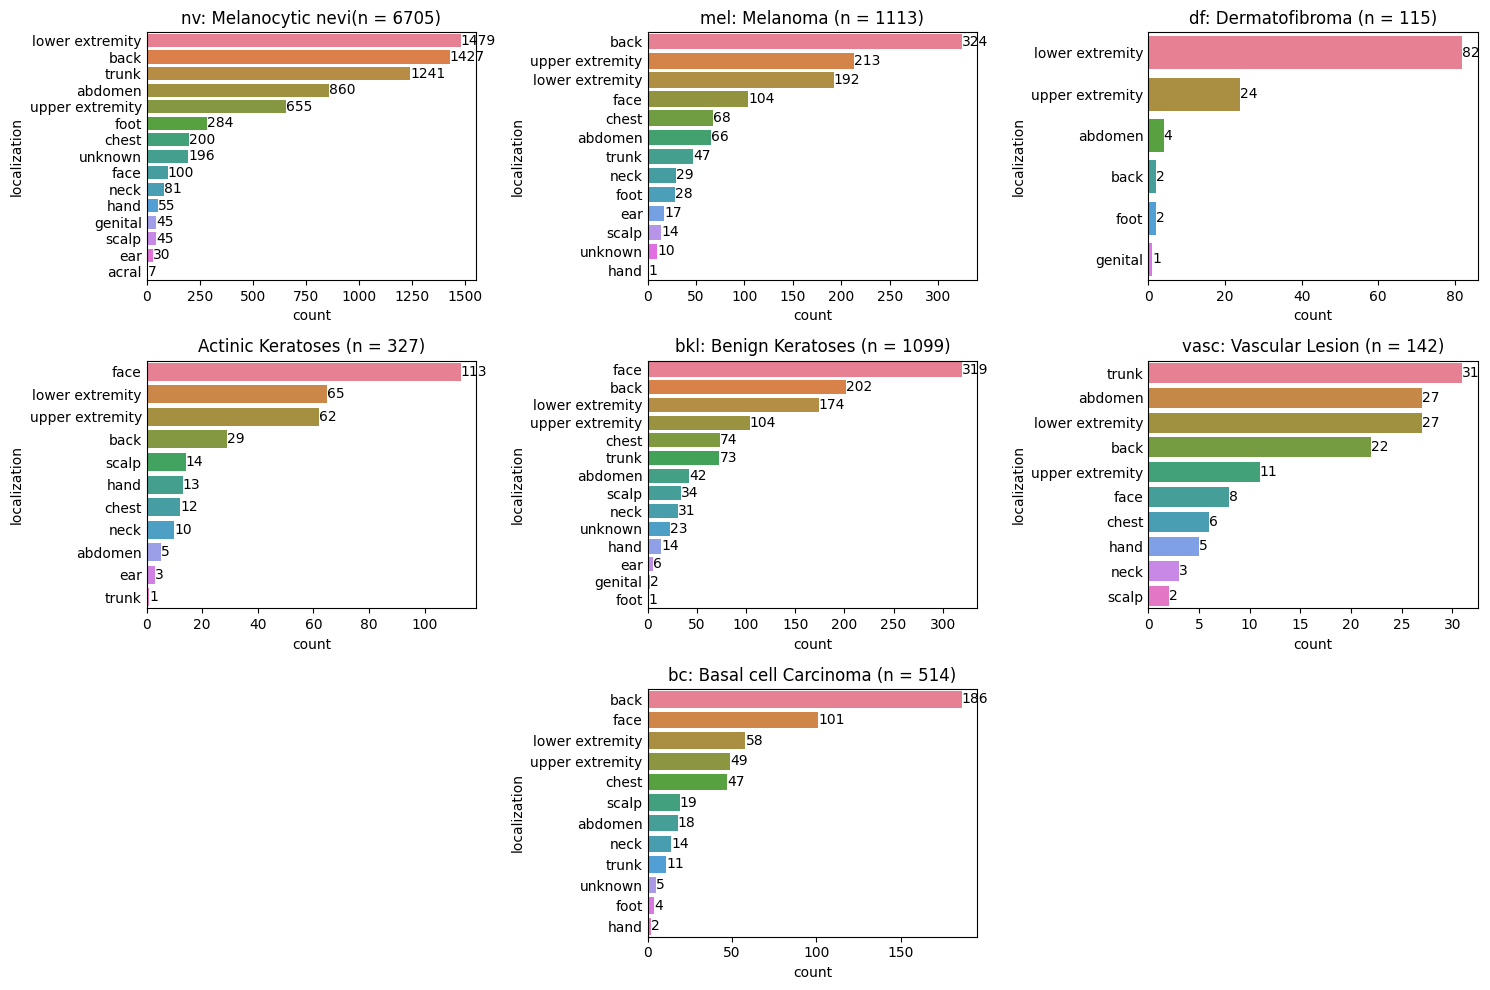

In [ ]:
# Getting a sense of the distribution of localization by diagnosis 

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(331)
ax1 = sns.barplot(x = "count",y = "localization",data = nv, palette='husl', order=nv.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax1.containers:
    ax1.bar_label(i,)
ax1.tick_params(axis='y', length=0)
ax1.set_title('nv: Melanocytic nevi(n = 6705)')
plt.tight_layout();

ax2 = fig.add_subplot(332)
ax2 = sns.barplot(x = "count",y = "localization",data = mel, palette='husl', order=mel.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax2.containers:
    ax2.bar_label(i,)
ax2.tick_params(axis='y', length=0)
ax2.set_title('mel: Melanoma (n = 1113)')
plt.tight_layout();

ax3 = fig.add_subplot(333)
ax3 = sns.barplot(x = "count",y = "localization",data = dfi, palette='husl', order=dfi.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax3.containers:
    ax3.bar_label(i,)
ax3.tick_params(axis='y', length=0)
ax3.set_title('df: Dermatofibroma (n = 115)')
plt.tight_layout();


ax4 = fig.add_subplot(334)
ax4 = sns.barplot(x = "count",y = "localization",data = akiec, palette='husl', order=akiec.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax4.containers:
    ax4.bar_label(i,)
ax4.tick_params(axis='y', length=0)
ax4.set_title('Actinic Keratoses (n = 327)')
plt.tight_layout();

ax5 = fig.add_subplot(335)
ax5 = sns.barplot(x = "count",y = "localization",data = bkl, palette='husl', order= bkl.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax5.containers:
    ax5.bar_label(i,)
ax5.tick_params(axis='y', length=0)
ax5.set_title('bkl: Benign Keratoses (n = 1099)')
plt.tight_layout();

ax6 = fig.add_subplot(336)
ax6 = sns.barplot(x = "count",y = "localization",data = vasc, palette='husl', order= vasc.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax6.containers:
    ax6.bar_label(i,)
ax6.tick_params(axis='y', length=0)
ax6.set_title('vasc: Vascular Lesion (n = 142)')
plt.tight_layout();

ax7 = fig.add_subplot(338)
ax7 = sns.barplot(x = "count",y = "localization",data = bcc, palette='husl', order= bcc.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax7.containers:
    ax7.bar_label(i,)
ax7.tick_params(axis='y', length=0)
ax7.set_title('bc: Basal cell Carcinoma (n = 514)')
plt.tight_layout();


plt.tight_layout()
plt.show()



Here, we try to determine how each variable relates with the other

<Figure size 2000x500 with 0 Axes>

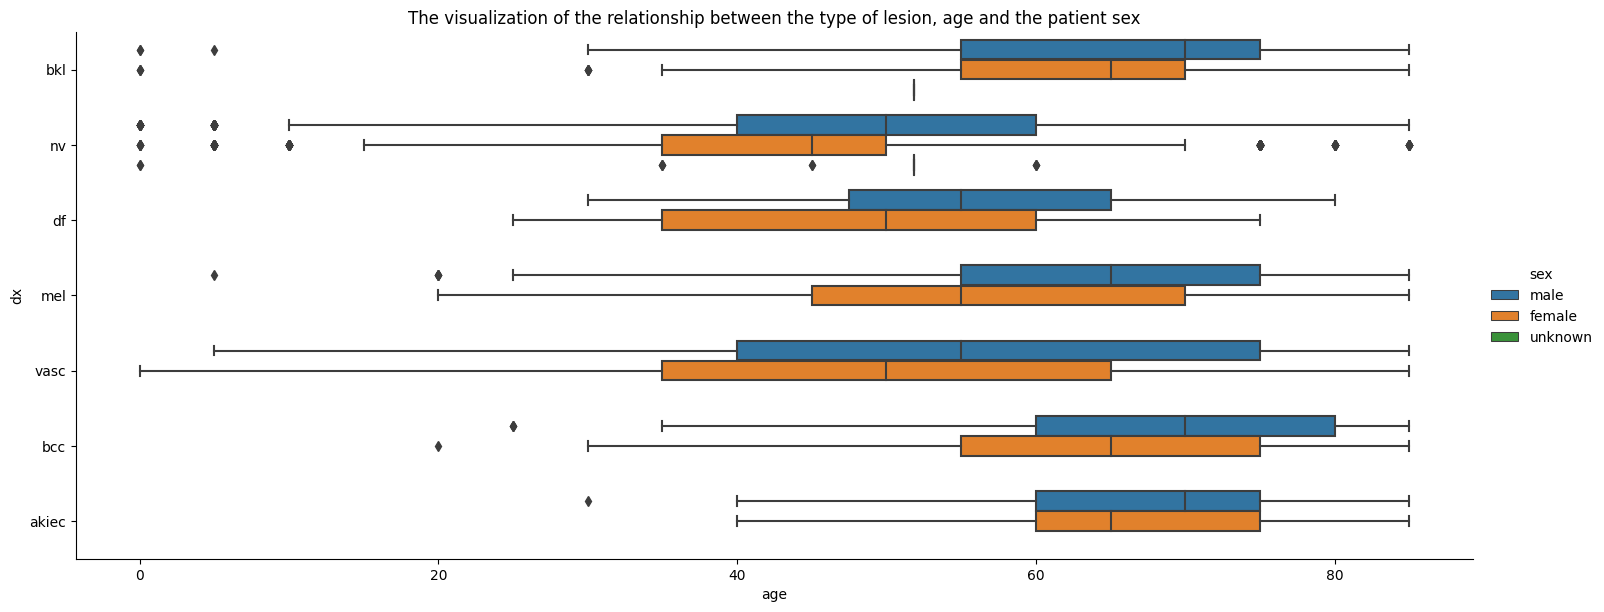

In [ ]:
# A plot of the relationship between the age, sex and lesion type
plt.figure(figsize=(20,5))
sns.catplot(y="dx", x="age", hue="sex",kind="box", height = 6, aspect = 2.5,  data=df).set(title='The visualization of the relationship between the type of lesion, age and the patient sex')
plt.show()

In [ ]:
mela = df[df["dx"] == "mel"]
mel_fem = mela[mela["sex"] == "female"]
mel_male = mela[mela["sex"] == "male"]
print("Median age of female with Melanoma is ", mel_fem["age"].median())
print("Median age of male with Melanoma is ", mel_male["age"].median())

Median age of female with Melanoma is  55.0
Median age of male with Melanoma is  65.0


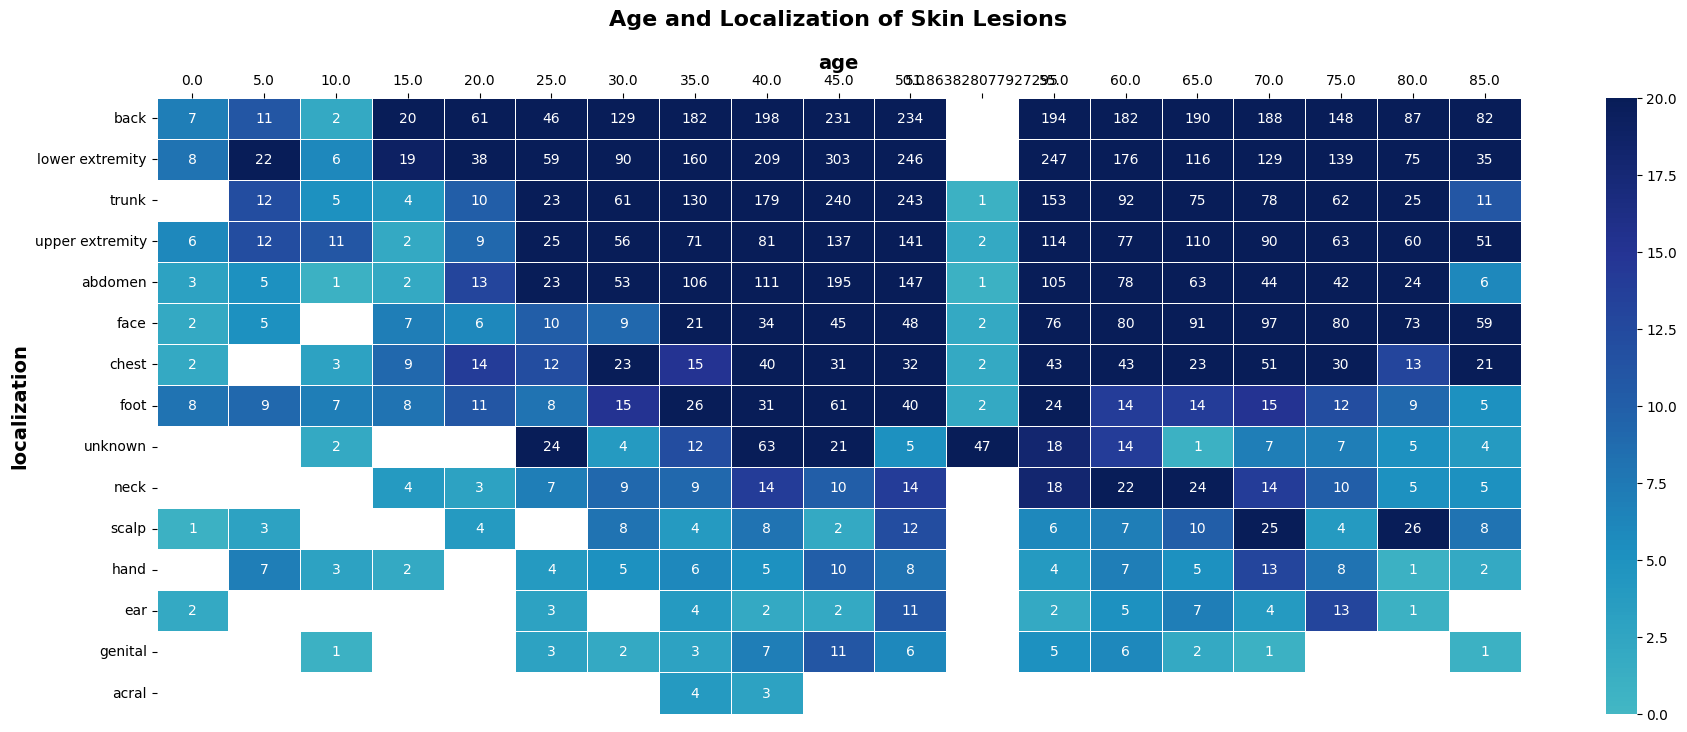

In [ ]:
# Heat Map Representation 
skin_local = df.groupby(['localization']).size().sort_values(ascending=False, inplace=False).reset_index()
skin_local.columns = ['localization', 'count']
sort_by = skin_local['localization']

skin_local_age = df.groupby(['age','localization']).size().reset_index()
skin_local_age.columns = ['age', 'localization', 'count']
skin_local_age.sort_values( "count", ascending=False, inplace=True)

def heatmap(df, index,columns,values,vmax,sort_by,Title):
    df_wide = df.pivot(index=index, columns=columns, values=values)
    df_wide = df_wide.reindex(index=sort_by)
    plt.figure(figsize=(22,8))
    ax = sns.heatmap(df_wide, annot=True, fmt='.0f', yticklabels='auto', cmap=sns.color_palette("YlGnBu", as_cmap=True), center=.2,vmin = 0, vmax = vmax,linewidths=.5)
    ax.xaxis.tick_top() # x axis on top
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(columns,fontsize = 14,weight = 'bold')
    ax.set_ylabel(index,fontsize = 14,weight = 'bold')    
    ax.set_title(Title,fontsize = 16,weight = 'bold',pad=20)
    plt.show()
    
heatmap(skin_local_age,'localization', 'age','count', 20,sort_by,'Age and Localization of Skin Lesions')

## **Pre-process the data to identify the best features for acceptable performance**

### **Feature Engineering**

In [ ]:
#Define the lesion names in a list
lesion_names = ['Melanocytic nevi','Melanoma','Benign keratosis-like lesions ',
               'Basal cell carcinoma','Actinic keratoses','Vascular lesions',
               'Dermatofibroma']

In [ ]:
lesion_img = df.groupby('lesion_id')['image_id']\
               .count()\
               .to_frame()

In [ ]:
# Encoding target values
lesion_type_dict = {
    'nv':'Melanocytic Nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
    
}

In [ ]:
# Assign a numeric values to our target variables
lesion_ID_dict = {
    'nv': 0,
    'mel': 1,
    'bkl': 2,
    'bcc': 3,
    'akiec': 4,
    'vasc': 5,
    'df': 6
}

In [ ]:
# Create new columns named "cell_type" and "lesion_ID" to depict the ecoded target values
df['cell_type'] = df['dx'].map(lesion_type_dict.get)
df['lesion_ID'] = df['dx'].map(lesion_ID_dict.get)

In [ ]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,lesion_ID
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,Benign keratosis,2
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,Actinic keratoses,4
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,Actinic keratoses,4
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,Actinic keratoses,4
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,Actinic keratoses,4


In [ ]:
# Define the path
path = '/content/drive/MyDrive/HAM10000_images'

In [ ]:
# Reading the Image Path
images_path = {os.path.splitext(os.path.basename(x))[0]: 
               x for x in glob.glob('/content/drive/MyDrive/HAM10000_images/*.jpg')}

In [ ]:
len(images_path)

10015

In [ ]:
# Create a column for the path for each image. 
df['path'] = df['image_id'].map(images_path.get)

In [ ]:
#View wthe first 5 elements of the dataset
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,lesion_ID,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis,2,/content/drive/MyDrive/HAM10000_images/ISIC_00...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis,2,/content/drive/MyDrive/HAM10000_images/ISIC_00...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis,2,/content/drive/MyDrive/HAM10000_images/ISIC_00...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis,2,/content/drive/MyDrive/HAM10000_images/ISIC_00...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,Benign keratosis,2,/content/drive/MyDrive/HAM10000_images/ISIC_00...


In [ ]:
# Check for Image duplicate
num_unique_id = df["image_id"].nunique()

In [ ]:
# Print the number of unique image_id 
print(f"There are {num_unique_id} unique image IDs in the dataset")

There are 10015 unique image IDs in the dataset


In [ ]:
# SetThe lesion_ID as y
y = df["lesion_ID"]

In [ ]:
# View the first 5 items on the y column
y.head()

0    2
1    2
2    2
3    2
4    2
Name: lesion_ID, dtype: int64

In [ ]:
#Convert y to a float arrays
y = np.array(y)
print(y.shape)

(10015,)


In [ ]:
df["path"].head()

0    /content/drive/MyDrive/HAM10000_images/ISIC_00...
1    /content/drive/MyDrive/HAM10000_images/ISIC_00...
2    /content/drive/MyDrive/HAM10000_images/ISIC_00...
3    /content/drive/MyDrive/HAM10000_images/ISIC_00...
4    /content/drive/MyDrive/HAM10000_images/ISIC_00...
Name: path, dtype: object

In [ ]:
# Define a function that reads and resizes the Images
def get_img(img_path):
  img = cv2.imread(img_path,1)
  img = cv2.resize(img,(71, 71))
  return img

In [ ]:
# Append the images from the path to 
x = []
for img_name in tqdm(df['path'].values):
  x.append(get_img(img_name))

100%|██████████| 10015/10015 [12:39<00:00, 13.19it/s]


In [ ]:
#Convert x to float arrays and normalize it
x = np.array(x)/255
print(x.shape)

(10015, 71, 71, 3)


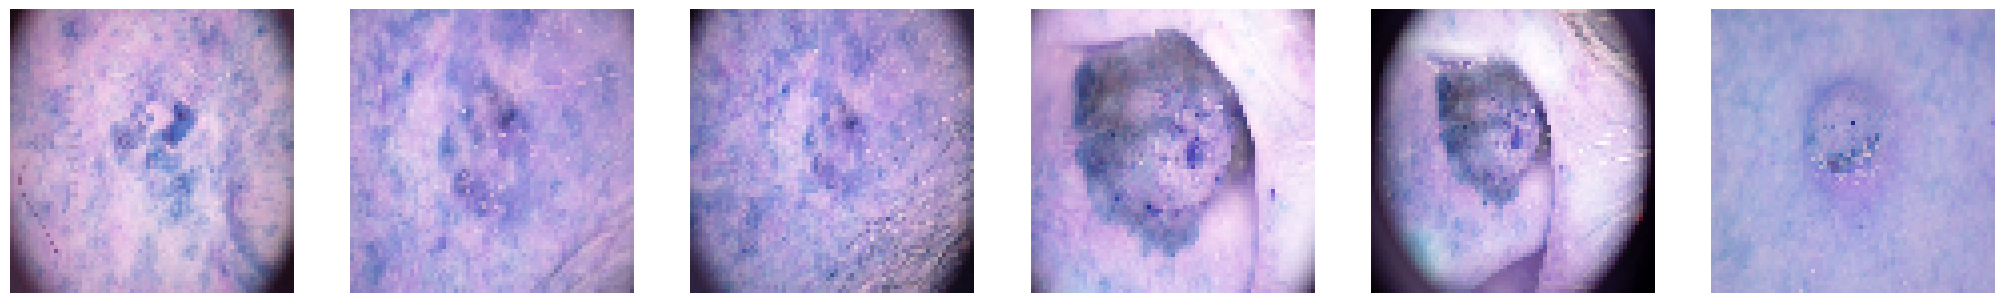

In [ ]:
from numpy.core.function_base import linspace
#Visualizing the train data set 
plt.figure(figsize = (30, 15))
for i in range(1, 7, ):
    plt.subplot(1, 7, i)
    plt.imshow(x[i])
    #plt.title(lesion_names[np.argmax(y[i])])
    plt.axis("off")
plt.show()

In [ ]:
# Checking the dataframe info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
 8   cell_type     10015 non-null  object 
 9   lesion_ID     10015 non-null  int64  
 10  path          10015 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 860.8+ KB


In [ ]:
#View wthe first 5 elements of the dataset
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,lesion_ID,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis,2,/content/drive/MyDrive/HAM10000_images/ISIC_00...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis,2,/content/drive/MyDrive/HAM10000_images/ISIC_00...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis,2,/content/drive/MyDrive/HAM10000_images/ISIC_00...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis,2,/content/drive/MyDrive/HAM10000_images/ISIC_00...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,Benign keratosis,2,/content/drive/MyDrive/HAM10000_images/ISIC_00...


### **Pre-Proccessing Stage**

In [ ]:
# Splitting the data
#split the x and y into (x_train, x_test) and (y_train, y_test) respectively
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.10,random_state=28,stratify=y)

#split x_train and y_train into (x_train, x_val) and (y_train, y_val)
x_train,x_val,y_train,y_val =  train_test_split(x_train,y_train,test_size=0.10,random_state=28,stratify=y_train) 

In [ ]:
#View the shape of the newly formed datasets
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(8111, 71, 71, 3)
(902, 71, 71, 3)
(1002, 71, 71, 3)
(8111,)
(902,)
(1002,)


In [ ]:
y_idval = y_val

In [ ]:
#Make a copy of the y_train array
y_id = y_train
y_id

array([2, 0, 1, ..., 1, 0, 0])

In [ ]:
# Make a copy of the y_test array
y_idtest = y_test
y_idtest

array([0, 0, 0, ..., 0, 3, 2])

In [ ]:
# One-Hot Encoding values
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes =7)
y_val = to_categorical(y_val , num_classes=7)

In [ ]:
# print the shapes of the y variables
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(8111, 7)
(1002, 7)
(902, 7)


In [ ]:
#Check for dataset Balanceness
df['lesion_ID'].value_counts()
#We can see that the dataset is not balanced

0    6705
1    1113
2    1099
3     514
4     327
5     142
6     115
Name: lesion_ID, dtype: int64

### **Resolving the Unbalanced data by weight assignment**


In [ ]:
#from sklearn.utils.class_weight import compute_sample_weight
from sklearn.utils import class_weight

In [ ]:
# Define the class labels and their corresponding weights
class_labels = np.unique(df['dx'])
y = df["dx"]
class_weights = class_weight.compute_class_weight('balanced', classes = class_labels, y = y)
class_weights

array([ 4.37527304,  2.78349083,  1.30183284, 12.44099379,  1.28545758,
        0.21338021, 10.07545272])

In [ ]:
# Build a dictionary of the class_weight
class_weights = dict(zip([0,1,2,3,4,5,6], [4.37527304,  2.78349083,  1.30183284, 12.44099379,  1.28545758, 0.21338021, 10.07545272]))
class_weights


{0: 4.37527304,
 1: 2.78349083,
 2: 1.30183284,
 3: 12.44099379,
 4: 1.28545758,
 5: 0.21338021,
 6: 10.07545272}

## **Develop different neural network-based models to classify skin lesions**

#### **Define the Call back Methods**

In [ ]:
# Import the necessary libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D, Activation, Input, Reshape, Permute, concatenate, GlobalAveragePooling2D, AveragePooling2D, Multiply, Lambda
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.metrics import Recall
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop
import shutil
from keras.applications.inception_v3 import InceptionV3

In [ ]:
# Declare the filepath for the saved model
filepath = "model_HAM10000_images"

In [ ]:
# Add an early stopping 
early_stop = EarlyStopping(monitor='val_accuracy',patience=6,mode='auto', restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor= np.sqrt(0.1), patience=4, verbose=1,cooldown=0, mode='auto',min_delta=0.0001, min_lr=0.5e-6)

# Declare a checkpoint to save the best version of the model
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, 
                             mode='auto', save_weights_only=False)

In [ ]:
# Make a list of all the call_back methods 
callbacks_list = [checkpoint, reduce_lr, early_stop]

### **Model 1**

**Using Convolutional Neural Network (CNN)**

#### **The CNN model**

In [ ]:
modelCNN1 = keras.Sequential([
    layers.InputLayer(input_shape=[71, 71, 3]),
    
    # Block One
    layers.BatchNormalization(),
    layers.Conv2D(filters=96, kernel_size=3, activation="relu"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),

    # Block Two
    layers.BatchNormalization(),
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", 
                  padding = "same"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),

    # Block Three
    layers.BatchNormalization(),
    layers.Conv2D(filters=1024, kernel_size=3, activation="relu", 
                  padding = "same"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),
    
    # Block four
    layers.BatchNormalization(),
    layers.Conv2D(filters=1024, kernel_size=3, activation="relu", 
                  padding = "same"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),

    # Flatten
    layers.BatchNormalization(),
    layers.Flatten(),

    # Block Five
    layers.Dense(4096, activation="relu"),
    #layers.Dropout(0.5),
    
    # Block Six
    layers.Dense(4096, activation="relu"),
    #layers.Dropout(0.5),

    # output
    layers.Dense(7, activation='softmax')
])

In [ ]:
#Compile the Model
optimizer = tf.keras.optimizers.Adam(epsilon = 0.01)
modelCNN1.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Get the Summary of the Model
modelCNN1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_20 (Bat  (None, 71, 71, 3)        12        
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 69, 69, 96)        2688      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 34, 34, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_21 (Bat  (None, 34, 34, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 512)       442880    
                                                      

In [ ]:
#Training our CNN
#epochs = 40
historyCNN = modelCNN1.fit(x_train,
                     y_train, 
                     epochs=40, 
                     batch_size=90, 
                     #class_weight=class_weights, 
                     validation_data=(x_val, y_val),
                     callbacks=callbacks_list)

Epoch 1/40
90/91 [============================>.] - ETA: 0s - loss: 0.8438 - accuracy: 0.6957
Epoch 1: val_accuracy did not improve from 0.84146
91/91 [==============================] - 18s 145ms/step - loss: 0.8430 - accuracy: 0.6961 - val_loss: 2.2685 - val_accuracy: 0.1098 - lr: 0.0010
Epoch 2/40
90/91 [============================>.] - ETA: 0s - loss: 0.6643 - accuracy: 0.7564
Epoch 2: val_accuracy did not improve from 0.84146
91/91 [==============================] - 28s 306ms/step - loss: 0.6643 - accuracy: 0.7565 - val_loss: 1.9062 - val_accuracy: 0.6685 - lr: 0.0010
Epoch 3/40
90/91 [============================>.] - ETA: 0s - loss: 0.5869 - accuracy: 0.7796
Epoch 3: val_accuracy did not improve from 0.84146
91/91 [==============================] - 39s 433ms/step - loss: 0.5875 - accuracy: 0.7794 - val_loss: 2.4448 - val_accuracy: 0.3581 - lr: 0.0010
Epoch 4/40
90/91 [============================>.] - ETA: 0s - loss: 0.4992 - accuracy: 0.8144
Epoch 4: val_accuracy did not improv

In [ ]:
# View the tabulated result of the loss and accuracy values
pd.DataFrame(historyCNN.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,0.843031,0.696092,2.268539,0.109756,0.001000
1,0.664297,0.756504,1.906187,0.668514,0.001000
2,0.587502,0.779435,2.444803,0.358093,0.001000
3,0.498985,0.814449,1.808382,0.669623,0.001000
4,0.395439,0.852916,1.160014,0.722838,0.001000
5,0.317864,0.883122,0.700731,0.745011,0.001000
6,0.280856,0.892615,0.668402,0.784922,0.001000
7,0.259743,0.906793,0.686390,0.787140,0.001000
8,0.163410,0.942301,0.734442,0.754989,0.001000
9,0.135881,0.949821,0.760587,0.780488,0.001000


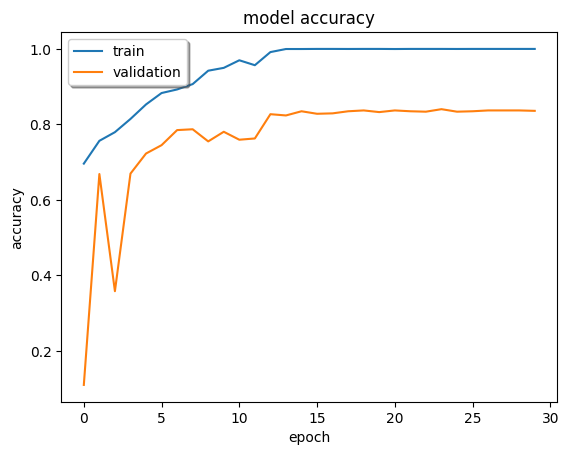

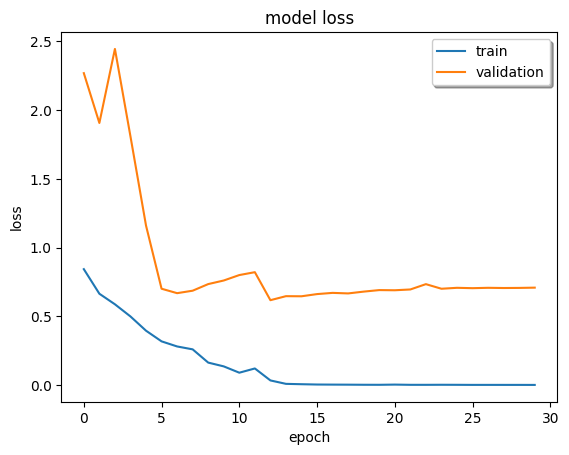

In [ ]:
# summarize history for accuracy
plt.plot(historyCNN.history['accuracy'])
plt.plot(historyCNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left', shadow = True)
plt.show()
# summarize history for loss
plt.plot(historyCNN.history['loss'])
plt.plot(historyCNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best', shadow = True)
plt.show()

In [ ]:
# Make predictions
predictionsCNN = modelCNN1.predict_generator(x_test, verbose=1)

32/32 [==============================] - 2s 57ms/step


In [ ]:
# View the resultd of the predictions 
predictionsCNN

array([[9.3822736e-01, 6.1612774e-02, 1.4537826e-04, ..., 1.1622154e-06,
        2.2004426e-06, 1.0667984e-05],
       [5.4463154e-01, 1.1630152e-02, 4.4368646e-01, ..., 2.9585444e-05,
        1.4998478e-05, 2.4101416e-06],
       [1.0000000e+00, 1.0535758e-13, 2.4444169e-11, ..., 6.8896771e-13,
        4.3255287e-12, 2.5114492e-12],
       ...,
       [9.9999964e-01, 3.5192480e-07, 1.7464340e-09, ..., 1.2213622e-10,
        9.2007749e-11, 8.5999186e-10],
       [2.3827780e-02, 1.8789617e-02, 6.4956717e-04, ..., 6.2765321e-05,
        3.5817363e-06, 3.1545234e-03],
       [6.6926875e-03, 7.6855010e-01, 2.2440968e-01, ..., 1.8139805e-04,
        8.8357581e-08, 7.1678387e-06]], dtype=float32)

In [ ]:
# Convert predicted values from an array to a Dataframe and round up to 4 decimal place
# For each row there are predicted % for each of the classes 0 t0 6
pred_CNN = np.around(pd.DataFrame(predictionsCNN), 4)
pred_CNN

,0,1,2,3,4,5,6
0,0.9382,0.0616,0.0001,0.0000,0.0000,0.0,0.0000
1,0.5446,0.0116,0.4437,0.0000,0.0000,0.0,0.0000
2,1.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000
3,0.9979,0.0000,0.0021,0.0000,0.0000,0.0,0.0000
4,1.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000
...,...,...,...,...,...,...,...
997,0.0003,0.9995,0.0000,0.0000,0.0002,0.0,0.0000
998,0.7690,0.2309,0.0001,0.0000,0.0000,0.0,0.0000
999,1.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000
1000,0.0238,0.0188,0.0006,0.9535,0.0001,0.0,0.0032


In [ ]:
# Obtain the indice of the maximum value for each row
y_pred_CNN = np.argmax(predictionsCNN, axis = 1)
y_pred_CNN

array([0, 0, 0, ..., 0, 3, 1])

**Model Evaluation**

In [ ]:
# Create the confusion matrix 
confusion_matrix(y_pred_CNN, y_idtest)

array([[646,  46,  32,   5,   2,   1,   4],
       [ 12,  58,  11,   1,   0,   1,   3],
       [ 10,   6,  64,   3,   8,   0,   1],
       [  3,   0,   3,  39,   3,   1,   0],
       [  0,   1,   0,   3,  20,   0,   0],
       [  0,   0,   0,   0,   0,  11,   0],
       [  0,   0,   0,   0,   0,   0,   4]])

In [ ]:
# Determine the accuracy score of the modelCNN
accuracy_score(y_pred_CNN,y_idtest)

0.8403193612774451

In [ ]:
print(classification_report(y_idtest,y_pred_CNN))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       671
           1       0.67      0.52      0.59       111
           2       0.70      0.58      0.63       110
           3       0.80      0.76      0.78        51
           4       0.83      0.61      0.70        33
           5       1.00      0.79      0.88        14
           6       1.00      0.33      0.50        12

    accuracy                           0.84      1002
   macro avg       0.84      0.65      0.71      1002
weighted avg       0.83      0.84      0.83      1002



In [ ]:
# Show the accuracy of the model by class for each of the lesion in the dataset
class_accuracy_CNN = []

for i in range(7):
    acc = round(np.mean(y_idtest[y_idtest == i] == y_pred_CNN[y_idtest == i]),2)
    lab_name = lesion_names[i]
    print('The Model accuracy for ',lab_name,'=',acc)
    class_accuracy_CNN.append(acc)

The Model accuracy for  Melanocytic nevi = 0.96
The Model accuracy for  Melanoma = 0.52
The Model accuracy for  Benign keratosis-like lesions  = 0.58
The Model accuracy for  Basal cell carcinoma = 0.76
The Model accuracy for  Actinic keratoses = 0.61
The Model accuracy for  Vascular lesions = 0.79
The Model accuracy for  Dermatofibroma = 0.33


In [ ]:
# Get the tabulated visualization of the Model's accuracy for each lesion 
acc_tab = pd.DataFrame(list(zip(lesion_ID_dict, class_accuracy_CNN)))
acc_tab.columns = ["Lesion", "Accuracy"]
acc_tab

,Lesion,Accuracy
0,nv,0.96
1,mel,0.52
2,bkl,0.58
3,bcc,0.76
4,akiec,0.61
5,vasc,0.79
6,df,0.33


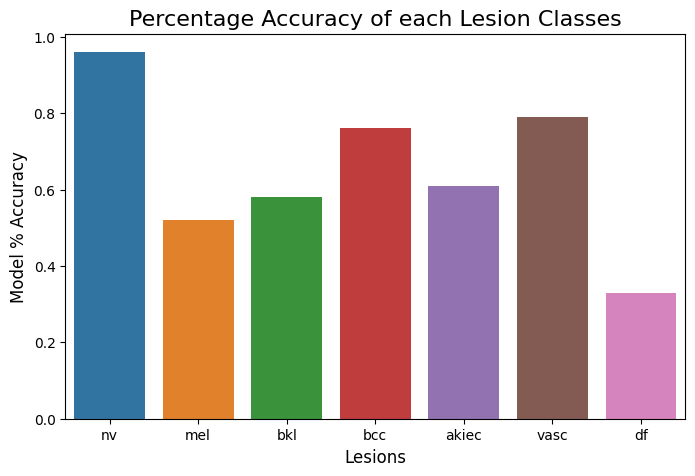

In [ ]:
# Visualise the graphical representation of the % Accuracy of the Model
plt.figure(figsize = (8, 5))
sns.barplot(data=acc_tab, x="Lesion", y= "Accuracy", hue=None)
plt.xlabel('Lesions', size=12)
plt.ylabel('Model % Accuracy', size=12)
plt.title('Percentage Accuracy of each Lesion Classes', size=16)
plt.show()

#### **The CNN model  + Dropout**

In [ ]:
modelCNN = keras.Sequential([
    layers.InputLayer(input_shape=[71, 71, 3]),
    
    # Block One
    layers.BatchNormalization(),
    layers.Conv2D(filters=96, kernel_size=3, activation="relu"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),

    # Block Two
    layers.BatchNormalization(),
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", 
                  padding = "same"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),

    # Block Three
    layers.BatchNormalization(),
    layers.Conv2D(filters=1024, kernel_size=3, activation="relu", 
                  padding = "same"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),
    
    # Block four
    layers.BatchNormalization(),
    layers.Conv2D(filters=1024, kernel_size=3, activation="relu", 
                  padding = "same"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),

    # Flatten
    layers.BatchNormalization(),
    layers.Flatten(),

    # Block Five
    layers.Dense(4096, activation="relu"),
    layers.Dropout(0.5),
    
    # Block Six
    layers.Dense(4096, activation="relu"),
    layers.Dropout(0.5),

    # output
    layers.Dense(7, activation='softmax')
])

In [ ]:
#Compile the Model
optimizer = tf.keras.optimizers.Adam(epsilon = 0.01)
modelCNN.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Get the Summary of the Model
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 71, 71, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 69, 69, 96)        2688      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 96)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 34, 34, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 512)       442880    
                                                        

In [ ]:
#Training our CNN
#epochs = 40
historyCNN = modelCNN.fit(x_train,
                     y_train, 
                     epochs=40, 
                     batch_size=90, 
                     #class_weight=class_weights, 
                     validation_data=(x_val, y_val),
                     callbacks=callbacks_list)

Epoch 1/40
91/91 [==============================] - ETA: 0s - loss: 1.1604 - accuracy: 0.6558
Epoch 1: val_accuracy improved from -inf to 0.10976, saving model to model_HAM10000_images


91/91 [==============================] - 66s 543ms/step - loss: 1.1604 - accuracy: 0.6558 - val_loss: 2.2442 - val_accuracy: 0.1098 - lr: 0.0010
Epoch 2/40
90/91 [============================>.] - ETA: 0s - loss: 0.9411 - accuracy: 0.6898
Epoch 2: val_accuracy improved from 0.10976 to 0.67517, saving model to model_HAM10000_images


91/91 [==============================] - 35s 390ms/step - loss: 0.9403 - accuracy: 0.6898 - val_loss: 1.8001 - val_accuracy: 0.6752 - lr: 0.0010
Epoch 3/40
90/91 [============================>.] - ETA: 0s - loss: 0.8467 - accuracy: 0.7119
Epoch 3: val_accuracy did not improve from 0.67517
91/91 [==============================] - 32s 355ms/step - loss: 0.8473 - accuracy: 0.7116 - val_loss: 1.9661 - val_accuracy: 0.4357 - lr: 0.0010
Epoch 4/40
90/91 [============================>.] - ETA: 0s - loss: 0.7749 - accuracy: 0.7248
Epoch 4: val_accuracy improved from 0.67517 to 0.67738, saving model to model_HAM10000_images


91/91 [==============================] - 34s 378ms/step - loss: 0.7748 - accuracy: 0.7248 - val_loss: 1.2818 - val_accuracy: 0.6774 - lr: 0.0010
Epoch 5/40
90/91 [============================>.] - ETA: 0s - loss: 0.7085 - accuracy: 0.7410
Epoch 5: val_accuracy did not improve from 0.67738
91/91 [==============================] - 35s 388ms/step - loss: 0.7079 - accuracy: 0.7412 - val_loss: 1.0047 - val_accuracy: 0.5831 - lr: 0.0010
Epoch 6/40
90/91 [============================>.] - ETA: 0s - loss: 0.6615 - accuracy: 0.7615
Epoch 6: val_accuracy improved from 0.67738 to 0.74723, saving model to model_HAM10000_images


91/91 [==============================] - 28s 311ms/step - loss: 0.6615 - accuracy: 0.7616 - val_loss: 0.6719 - val_accuracy: 0.7472 - lr: 0.0010
Epoch 7/40
91/91 [==============================] - ETA: 0s - loss: 0.6405 - accuracy: 0.7624
Epoch 7: val_accuracy improved from 0.74723 to 0.76829, saving model to model_HAM10000_images


91/91 [==============================] - 51s 569ms/step - loss: 0.6405 - accuracy: 0.7624 - val_loss: 0.6383 - val_accuracy: 0.7683 - lr: 0.0010
Epoch 8/40
90/91 [============================>.] - ETA: 0s - loss: 0.6203 - accuracy: 0.7652
Epoch 8: val_accuracy did not improve from 0.76829
91/91 [==============================] - 34s 377ms/step - loss: 0.6200 - accuracy: 0.7654 - val_loss: 0.6423 - val_accuracy: 0.7594 - lr: 0.0010
Epoch 9/40
90/91 [============================>.] - ETA: 0s - loss: 0.5965 - accuracy: 0.7765
Epoch 9: val_accuracy did not improve from 0.76829
91/91 [==============================] - 33s 366ms/step - loss: 0.5970 - accuracy: 0.7765 - val_loss: 0.7618 - val_accuracy: 0.7162 - lr: 0.0010
Epoch 10/40
91/91 [==============================] - ETA: 0s - loss: 0.6182 - accuracy: 0.7688
Epoch 10: val_accuracy improved from 0.76829 to 0.76940, saving model to model_HAM10000_images


91/91 [==============================] - 38s 426ms/step - loss: 0.6182 - accuracy: 0.7688 - val_loss: 0.6374 - val_accuracy: 0.7694 - lr: 0.0010
Epoch 11/40
91/91 [==============================] - ETA: 0s - loss: 0.5493 - accuracy: 0.7979
Epoch 11: val_accuracy did not improve from 0.76940
91/91 [==============================] - 39s 428ms/step - loss: 0.5493 - accuracy: 0.7979 - val_loss: 0.6602 - val_accuracy: 0.7594 - lr: 0.0010
Epoch 12/40
90/91 [============================>.] - ETA: 0s - loss: 0.5197 - accuracy: 0.8067
Epoch 12: val_accuracy improved from 0.76940 to 0.78825, saving model to model_HAM10000_images


91/91 [==============================] - 30s 331ms/step - loss: 0.5203 - accuracy: 0.8064 - val_loss: 0.6108 - val_accuracy: 0.7882 - lr: 0.0010
Epoch 13/40
90/91 [============================>.] - ETA: 0s - loss: 0.5162 - accuracy: 0.8046
Epoch 13: val_accuracy did not improve from 0.78825
91/91 [==============================] - 27s 300ms/step - loss: 0.5163 - accuracy: 0.8045 - val_loss: 0.6673 - val_accuracy: 0.7572 - lr: 0.0010
Epoch 14/40
91/91 [==============================] - ETA: 0s - loss: 0.4877 - accuracy: 0.8164
Epoch 14: val_accuracy did not improve from 0.78825
91/91 [==============================] - 40s 444ms/step - loss: 0.4877 - accuracy: 0.8164 - val_loss: 0.6237 - val_accuracy: 0.7761 - lr: 0.0010
Epoch 15/40
90/91 [============================>.] - ETA: 0s - loss: 0.4723 - accuracy: 0.8238
Epoch 15: val_accuracy did not improve from 0.78825
91/91 [==============================] - 25s 276ms/step - loss: 0.4730 - accuracy: 0.8237 - val_loss: 0.7040 - val_accuracy:

91/91 [==============================] - 35s 393ms/step - loss: 0.3411 - accuracy: 0.8729 - val_loss: 0.5432 - val_accuracy: 0.8171 - lr: 3.1623e-04
Epoch 18/40
90/91 [============================>.] - ETA: 0s - loss: 0.2933 - accuracy: 0.8904
Epoch 18: val_accuracy improved from 0.81707 to 0.82594, saving model to model_HAM10000_images


91/91 [==============================] - 34s 374ms/step - loss: 0.2936 - accuracy: 0.8903 - val_loss: 0.5193 - val_accuracy: 0.8259 - lr: 3.1623e-04
Epoch 19/40
90/91 [============================>.] - ETA: 0s - loss: 0.2644 - accuracy: 0.9019
Epoch 19: val_accuracy did not improve from 0.82594
91/91 [==============================] - 29s 327ms/step - loss: 0.2641 - accuracy: 0.9020 - val_loss: 0.5838 - val_accuracy: 0.8082 - lr: 3.1623e-04
Epoch 20/40
90/91 [============================>.] - ETA: 0s - loss: 0.2290 - accuracy: 0.9178
Epoch 20: val_accuracy did not improve from 0.82594
91/91 [==============================] - 30s 328ms/step - loss: 0.2298 - accuracy: 0.9174 - val_loss: 0.5897 - val_accuracy: 0.7971 - lr: 3.1623e-04
Epoch 21/40
90/91 [============================>.] - ETA: 0s - loss: 0.2475 - accuracy: 0.9078
Epoch 21: val_accuracy improved from 0.82594 to 0.82927, saving model to model_HAM10000_images


91/91 [==============================] - 39s 428ms/step - loss: 0.2473 - accuracy: 0.9079 - val_loss: 0.5353 - val_accuracy: 0.8293 - lr: 3.1623e-04
Epoch 22/40
90/91 [============================>.] - ETA: 0s - loss: 0.2010 - accuracy: 0.9280
Epoch 22: val_accuracy improved from 0.82927 to 0.84146, saving model to model_HAM10000_images


91/91 [==============================] - 39s 428ms/step - loss: 0.2009 - accuracy: 0.9281 - val_loss: 0.5064 - val_accuracy: 0.8415 - lr: 3.1623e-04
Epoch 23/40
91/91 [==============================] - ETA: 0s - loss: 0.1730 - accuracy: 0.9381
Epoch 23: val_accuracy did not improve from 0.84146
91/91 [==============================] - 34s 377ms/step - loss: 0.1730 - accuracy: 0.9381 - val_loss: 0.5237 - val_accuracy: 0.8348 - lr: 3.1623e-04
Epoch 24/40
90/91 [============================>.] - ETA: 0s - loss: 0.1675 - accuracy: 0.9440
Epoch 24: val_accuracy did not improve from 0.84146
91/91 [==============================] - 35s 388ms/step - loss: 0.1682 - accuracy: 0.9438 - val_loss: 0.5450 - val_accuracy: 0.8248 - lr: 3.1623e-04
Epoch 25/40
90/91 [============================>.] - ETA: 0s - loss: 0.1475 - accuracy: 0.9500
Epoch 25: val_accuracy did not improve from 0.84146
91/91 [==============================] - 36s 397ms/step - loss: 0.1478 - accuracy: 0.9498 - val_loss: 0.5850 - v

In [ ]:
# View the tabulated result of the loss and accuracy values
pd.DataFrame(historyCNN.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,1.160390,0.655776,2.244236,0.109756,0.001000
1,0.940345,0.689804,1.800068,0.675166,0.001000
2,0.847275,0.711626,1.966088,0.435698,0.001000
3,0.774849,0.724818,1.281831,0.677384,0.001000
4,0.707889,0.741216,1.004694,0.583149,0.001000
5,0.661510,0.761558,0.671933,0.747228,0.001000
6,0.640518,0.762421,0.638285,0.768293,0.001000
7,0.620048,0.765380,0.642302,0.759423,0.001000
8,0.596957,0.776476,0.761766,0.716186,0.001000
9,0.618203,0.768832,0.637443,0.769401,0.001000


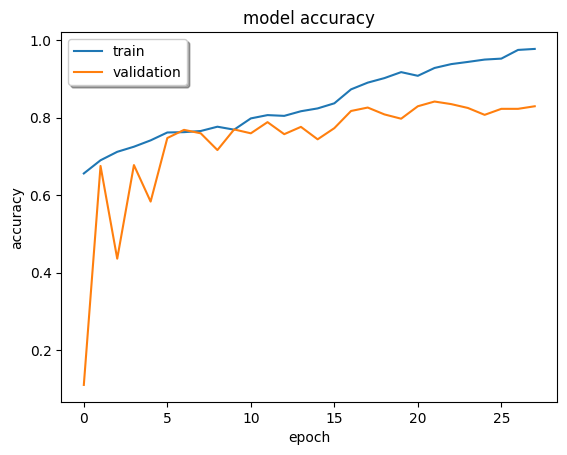

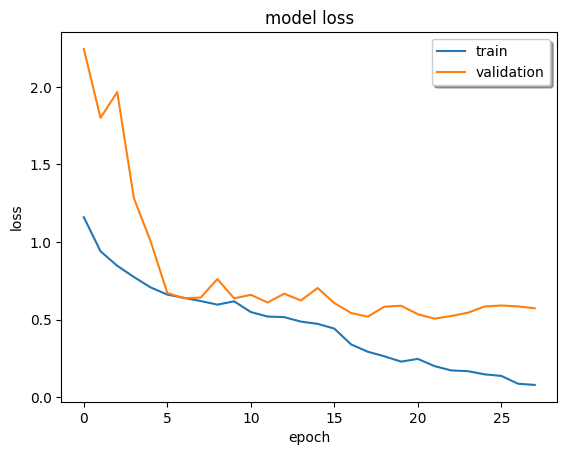

In [ ]:
# summarize history for accuracy
plt.plot(historyCNN.history['accuracy'])
plt.plot(historyCNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left', shadow = True)
plt.show()
# summarize history for loss
plt.plot(historyCNN.history['loss'])
plt.plot(historyCNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best', shadow = True)
plt.show()

In [ ]:
# Make predictions
predictionsCNN = modelCNN.predict_generator(x_test, verbose=1)

32/32 [==============================] - 4s 107ms/step


In [ ]:
# View the resultd of the predictions 
predictionsCNN

array([[7.32004464e-01, 2.62919039e-01, 4.19987738e-03, ...,
        5.79497428e-04, 1.00012105e-04, 1.38228526e-04],
       [6.83500767e-01, 2.77577806e-02, 2.87308961e-01, ...,
        5.86398994e-04, 3.85871419e-04, 1.88782127e-04],
       [9.99997854e-01, 1.30094827e-06, 7.13462100e-07, ...,
        9.03750532e-08, 6.37446693e-11, 5.21759036e-09],
       ...,
       [9.99986529e-01, 1.32549912e-05, 2.20295746e-07, ...,
        2.54161066e-08, 8.78942821e-11, 1.43635859e-09],
       [1.24270439e-01, 5.07667847e-02, 1.44271746e-01, ...,
        2.55948976e-02, 1.91155691e-02, 1.63456708e-01],
       [4.59144227e-02, 2.43952066e-01, 7.04053998e-01, ...,
        4.05308325e-03, 2.44744733e-04, 2.75502534e-04]], dtype=float32)

In [ ]:
# Convert predicted values from an array to a Dataframe and round up to 4 decimal place
# For each row there are predicted % for each of the classes 0 t0 6
pred_CNN = np.around(pd.DataFrame(predictionsCNN), 4)
pred_CNN

,0,1,2,3,4,5,6
0,0.7320,0.2629,0.0042,0.0001,0.0006,0.0001,0.0001
1,0.6835,0.0278,0.2873,0.0003,0.0006,0.0004,0.0002
2,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9121,0.0179,0.0695,0.0000,0.0001,0.0000,0.0003
4,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...
997,0.0036,0.9706,0.0054,0.0000,0.0203,0.0000,0.0000
998,0.7779,0.2160,0.0056,0.0001,0.0001,0.0003,0.0000
999,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1000,0.1243,0.0508,0.1443,0.4725,0.0256,0.0191,0.1635


In [ ]:
# Obtain the indice of the maximum value for each row
y_pred_CNN = np.argmax(predictionsCNN, axis = 1)
y_pred_CNN

array([0, 0, 0, ..., 0, 3, 2])

**Model Evaluation**

In [ ]:
# Create the confusion matrix 
confusion_matrix(y_pred_CNN, y_idtest)

array([[637,  42,  29,   5,   1,   1,   4],
       [ 15,  58,   5,   1,   1,   0,   1],
       [ 15,   8,  73,   2,   4,   0,   0],
       [  4,   1,   3,  38,   4,   0,   3],
       [  0,   2,   0,   5,  23,   0,   1],
       [  0,   0,   0,   0,   0,  13,   0],
       [  0,   0,   0,   0,   0,   0,   3]])

In [ ]:
# Determine the accuracy score of the modelCNN
accuracy_score(y_pred_CNN,y_idtest)

0.843313373253493

In [ ]:
print(classification_report(y_idtest,y_pred_CNN))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       671
           1       0.72      0.52      0.60       111
           2       0.72      0.66      0.69       110
           3       0.72      0.75      0.73        51
           4       0.74      0.70      0.72        33
           5       1.00      0.93      0.96        14
           6       1.00      0.25      0.40        12

    accuracy                           0.84      1002
   macro avg       0.83      0.68      0.72      1002
weighted avg       0.84      0.84      0.84      1002



In [ ]:
# Show the accuracy of the model by class for each of the lesion in the dataset
class_accuracy_CNN = []

for i in range(7):
    acc = round(np.mean(y_idtest[y_idtest == i] == y_pred_CNN[y_idtest == i]),2)
    lab_name = lesion_names[i]
    print('The Model accuracy for ',lab_name,'=',acc)
    class_accuracy_CNN.append(acc)

The Model accuracy for  Melanocytic nevi = 0.95
The Model accuracy for  Melanoma = 0.52
The Model accuracy for  Benign keratosis-like lesions  = 0.66
The Model accuracy for  Basal cell carcinoma = 0.75
The Model accuracy for  Actinic keratoses = 0.7
The Model accuracy for  Vascular lesions = 0.93
The Model accuracy for  Dermatofibroma = 0.25


In [ ]:
# Get the tabulated visualization of the Model's accuracy for each lesion 
acc_tab = pd.DataFrame(list(zip(lesion_ID_dict, class_accuracy_CNN)))
acc_tab.columns = ["Lesion", "Accuracy"]
acc_tab

,Lesion,Accuracy
0,nv,0.95
1,mel,0.52
2,bkl,0.66
3,bcc,0.75
4,akiec,0.70
5,vasc,0.93
6,df,0.25


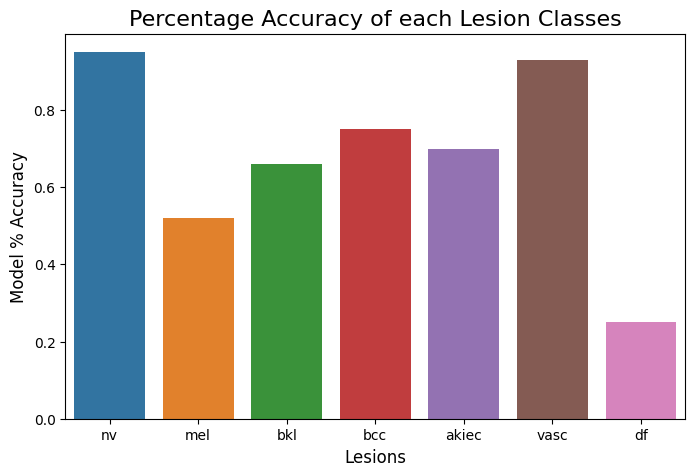

In [ ]:
# Visualise the graphical representation of the % Accuracy of the Model
plt.figure(figsize = (8, 5))
sns.barplot(data=acc_tab, x="Lesion", y= "Accuracy", hue=None)
plt.xlabel('Lesions', size=12)
plt.ylabel('Model % Accuracy', size=12)
plt.title('Percentage Accuracy of each Lesion Classes', size=16)
plt.show()

#### **The CNN Model + Dropout + Augmentation**

In [ ]:
#Data Augmentation 
datagen =ImageDataGenerator(rotation_range=90, # rotate the image 20 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 5%
                               height_shift_range=0.1, # Shift the pic height by a max of 5%                        
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.3, # Zoom in by 10% max
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='nearest')

In [ ]:
# Fit the data_generator to the train data
datagen.fit(x_train)

In [ ]:
modelCNN_imp = keras.Sequential([
    layers.InputLayer(input_shape=[71, 71, 3]),
    
    # Block One
    layers.BatchNormalization(),
    layers.Conv2D(filters=96, kernel_size=3, activation="relu"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),

    # Block Two
    layers.BatchNormalization(),
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", 
                  padding = "same"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),

    # Block Three
    layers.BatchNormalization(),
    layers.Conv2D(filters=1024, kernel_size=3, activation="relu", 
                  padding = "same"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),
    
    # Block four
    layers.BatchNormalization(),
    layers.Conv2D(filters=1024, kernel_size=3, activation="relu", 
                  padding = "same"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),

    # Flatten
    layers.BatchNormalization(),
    layers.Flatten(),

    # Block Five
    layers.Dense(4096, activation="relu"),
    layers.Dropout(0.5),
    
    # Block Six
    layers.Dense(4096, activation="relu"),
    layers.Dropout(0.5),

    # output
    layers.Dense(7, activation='softmax')
])

In [ ]:
#Compile the Model
optimizer = tf.keras.optimizers.Adam(epsilon = 0.01)
modelCNN_imp.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Training our Improved CNN model
historyCNN_imp = modelCNN_imp.fit(x_train,
                     y_train, 
                     epochs=40, 
                     batch_size=90, 
                     #sample_weight=sample_weights, 
                     validation_data=(x_val, y_val),
                     callbacks=callbacks_list)

Epoch 1/40
91/91 [==============================] - ETA: 0s - loss: 1.1860 - accuracy: 0.6478
Epoch 1: val_accuracy did not improve from 0.84146
91/91 [==============================] - 50s 510ms/step - loss: 1.1860 - accuracy: 0.6478 - val_loss: 2.8720 - val_accuracy: 0.1098 - lr: 0.0010
Epoch 2/40
90/91 [============================>.] - ETA: 0s - loss: 0.9664 - accuracy: 0.6890
Epoch 2: val_accuracy did not improve from 0.84146
91/91 [==============================] - 45s 501ms/step - loss: 0.9658 - accuracy: 0.6892 - val_loss: 1.5995 - val_accuracy: 0.6153 - lr: 0.0010
Epoch 3/40
91/91 [==============================] - ETA: 0s - loss: 0.8452 - accuracy: 0.7058
Epoch 3: val_accuracy did not improve from 0.84146
91/91 [==============================] - 45s 499ms/step - loss: 0.8452 - accuracy: 0.7058 - val_loss: 2.0595 - val_accuracy: 0.3714 - lr: 0.0010
Epoch 4/40
90/91 [============================>.] - ETA: 0s - loss: 0.7655 - accuracy: 0.7272
Epoch 4: val_accuracy did not improv

In [ ]:

# View the tabulated result of the loss and accuracy values
pd.DataFrame(historyCNN_imp.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,1.186008,0.647762,2.871984,0.109756,0.001000
1,0.965821,0.689188,1.599488,0.615299,0.001000
2,0.845209,0.705832,2.059521,0.371397,0.001000
3,0.765306,0.727161,1.205175,0.656319,0.001000
4,0.701203,0.745038,1.046400,0.559867,0.001000
5,0.676816,0.750586,0.664669,0.751663,0.001000
6,0.645363,0.764641,0.655805,0.753880,0.001000
7,0.604346,0.773887,0.650685,0.759423,0.001000
8,0.592690,0.786709,0.709808,0.745011,0.001000
9,0.570883,0.785477,0.610966,0.768293,0.001000


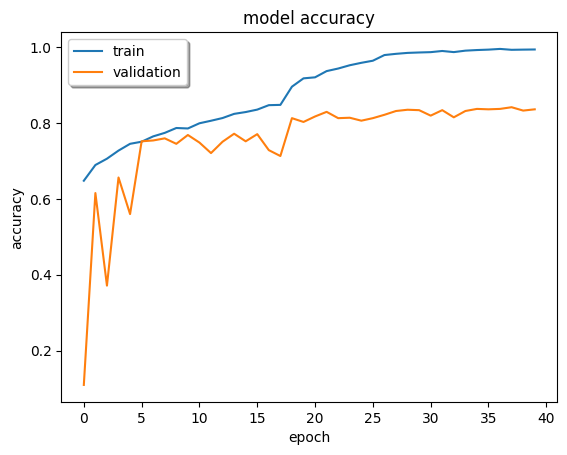

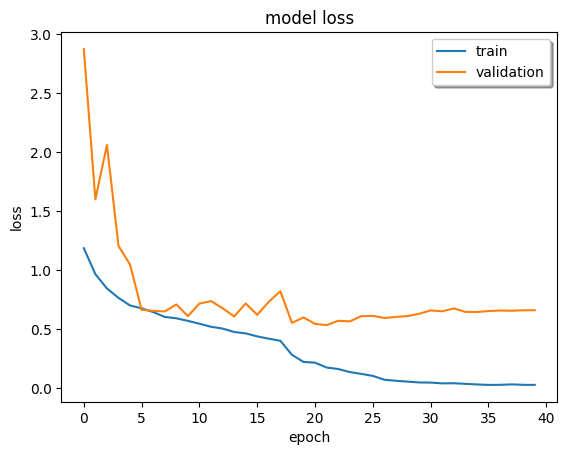

In [ ]:
# summarize history for accuracy
plt.plot(historyCNN_imp.history['accuracy'])
plt.plot(historyCNN_imp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left', shadow = True)
plt.show()
# summarize history for loss
plt.plot(historyCNN_imp.history['loss'])
plt.plot(historyCNN_imp.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best', shadow = True)
plt.show()

In [ ]:
# Make predictions
predictionsCNN_imp = modelCNN.predict_generator(x_test, verbose=1)

32/32 [==============================] - 1s 30ms/step


In [ ]:
# Convert predicted values from an array to a Dataframe and round up to 4 decimal place
# For each row there are predicted % for each of the classes 0 t0 6
pred_CNN_imp = np.around(pd.DataFrame(predictionsCNN_imp), 4)
pred_CNN_imp

,0,1,2,3,4,5,6
0,0.6590,0.3397,0.0009,0.0000,0.0002,0.0001,0.0001
1,0.8566,0.0361,0.1066,0.0002,0.0002,0.0002,0.0001
2,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9964,0.0027,0.0009,0.0000,0.0000,0.0000,0.0000
4,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...
997,0.0006,0.9846,0.0002,0.0000,0.0146,0.0000,0.0000
998,0.9248,0.0751,0.0000,0.0000,0.0000,0.0000,0.0000
999,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1000,0.3390,0.0615,0.0521,0.3745,0.0150,0.0207,0.1371


In [ ]:
# Obtain the indice of the maximum value for each row
y_pred_CNN_imp = np.argmax(predictionsCNN_imp, axis = 1)
y_pred_CNN_imp

array([0, 0, 0, ..., 0, 3, 1])

In [ ]:
# Determine the accuracy score of the modelCNN_imp
accuracy_score(y_pred_CNN_imp,y_idtest)

0.8073852295409182

In [ ]:
# Create the confusion matrix 
confusion_matrix(y_pred_CNN_imp, y_idtest)

array([[628,  40,  40,   3,   0,   1,   3],
       [ 29,  63,  24,   4,   1,   0,   3],
       [  8,   6,  40,   1,   2,   0,   0],
       [  4,   1,   5,  37,   4,   0,   2],
       [  1,   1,   1,   5,  25,   0,   1],
       [  1,   0,   0,   0,   0,  13,   0],
       [  0,   0,   0,   1,   1,   0,   3]])

In [ ]:
print(classification_report(y_idtest,y_pred_CNN_imp))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       671
           1       0.51      0.57      0.54       111
           2       0.70      0.36      0.48       110
           3       0.70      0.73      0.71        51
           4       0.74      0.76      0.75        33
           5       0.93      0.93      0.93        14
           6       0.60      0.25      0.35        12

    accuracy                           0.81      1002
   macro avg       0.72      0.65      0.67      1002
weighted avg       0.80      0.81      0.80      1002



In [ ]:
# Show the accuracy of the model by class for each of the lesion in the dataset
class_accuracy_CNN_imp = []

for i in range(7):
    acc = round(np.mean(y_idtest[y_idtest == i] == y_pred_CNN_imp[y_idtest == i]),2)
    lab_name = lesion_names[i]
    print('The Model accuracy for ',lab_name,'=',acc)
    class_accuracy_CNN_imp.append(acc)

The Model accuracy for  Melanocytic nevi = 0.94
The Model accuracy for  Melanoma = 0.57
The Model accuracy for  Benign keratosis-like lesions  = 0.36
The Model accuracy for  Basal cell carcinoma = 0.73
The Model accuracy for  Actinic keratoses = 0.76
The Model accuracy for  Vascular lesions = 0.93
The Model accuracy for  Dermatofibroma = 0.25


In [ ]:
# Get the tabulated visualization of the Model's accuracy for each lesion 
acc_tab = pd.DataFrame(list(zip(lesion_ID_dict, class_accuracy_CNN_imp)))
acc_tab.columns = ["Lesion", "Accuracy"]
acc_tab

,Lesion,Accuracy
0,nv,0.94
1,mel,0.57
2,bkl,0.36
3,bcc,0.73
4,akiec,0.76
5,vasc,0.93
6,df,0.25


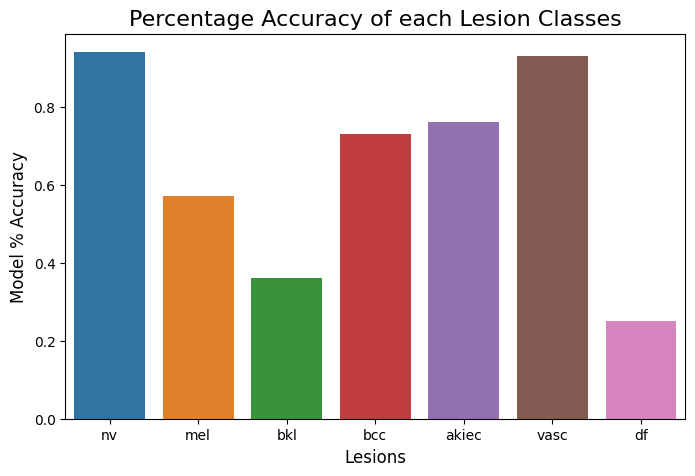

In [ ]:
# Visualise the graphical representation of the % Accuracy of the Model
plt.figure(figsize = (8, 5))
sns.barplot(data=acc_tab, x="Lesion", y= "Accuracy", hue=None)
plt.xlabel('Lesions', size=12)
plt.ylabel('Model % Accuracy', size=12)
plt.title('Percentage Accuracy of each Lesion Classes', size=16)
plt.show()

In [ ]:
# Visualize the Image and it's predictions 
plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    index = i+100
    plt.imshow(x_test[index,:,:,::-1])
    label_exp = lesion_names[y_idtest[index]]  #expected label
    label_pred = lesion_names[y_pred_CNN_imp[index]]  #predicted label
    #label_pred_prob = round(np.max(y_pred_prob[index])*100)
    plt.title('Expected:'+str(label_exp)+'\n Pred.:'+str(label_pred))  
    plt.ylabel('')
    plt.tight_layout()
    plt.savefig('final_figure.png',dpi=300)
plt.show()

#### **The CNN model + Dropout + Augmentation + Classweight**

In [ ]:
modelCNN2 = keras.Sequential([
    layers.InputLayer(input_shape=[71, 71, 3]),
    
    # Block One
    layers.BatchNormalization(),
    layers.Conv2D(filters=96, kernel_size=3, activation="relu"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),

    # Block Two
    layers.BatchNormalization(),
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", 
                  padding = "same"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),

    # Block Three
    layers.BatchNormalization(),
    layers.Conv2D(filters=1024, kernel_size=3, activation="relu", 
                  padding = "same"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),
    
    # Block four
    layers.BatchNormalization(),
    layers.Conv2D(filters=1024, kernel_size=3, activation="relu", 
                  padding = "same"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),

    # Flatten
    layers.BatchNormalization(),
    layers.Flatten(),

    # Block Five
    layers.Dense(4096, activation="relu"),
    layers.Dropout(0.5),
    
    # Block Six
    layers.Dense(4096, activation="relu"),
    layers.Dropout(0.5),

    # output
    layers.Dense(7, activation='softmax')
])

In [ ]:
#Compile the Model
optimizer = tf.keras.optimizers.Adam(epsilon = 0.01)
modelCNN2.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Get the Summary of the Model
modelCNN2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_5 (Batc  (None, 71, 71, 3)        12        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 69, 69, 96)        2688      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 34, 34, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 34, 34, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 512)       442880    
                                                      

In [ ]:
#Training our CNN
#epochs = 40
historyCNN2 = modelCNN2.fit(x_train,
                     y_train, 
                     epochs=40, 
                     batch_size=90, 
                     class_weight=class_weights, 
                     validation_data=(x_val, y_val),
                     callbacks=callbacks_list)

Epoch 1/40
90/91 [============================>.] - ETA: 0s - loss: 6.5348 - accuracy: 0.6198
Epoch 1: val_accuracy did not improve from 0.84146
91/91 [==============================] - 42s 411ms/step - loss: 6.5284 - accuracy: 0.6200 - val_loss: 2.4027 - val_accuracy: 0.1098 - lr: 0.0010
Epoch 2/40
90/91 [============================>.] - ETA: 0s - loss: 3.9355 - accuracy: 0.6625
Epoch 2: val_accuracy did not improve from 0.84146
91/91 [==============================] - 41s 456ms/step - loss: 3.9352 - accuracy: 0.6627 - val_loss: 2.4947 - val_accuracy: 0.6696 - lr: 0.0010
Epoch 3/40
91/91 [==============================] - ETA: 0s - loss: 2.9220 - accuracy: 0.6888
Epoch 3: val_accuracy did not improve from 0.84146
91/91 [==============================] - 39s 433ms/step - loss: 2.9220 - accuracy: 0.6888 - val_loss: 1.2979 - val_accuracy: 0.6497 - lr: 0.0010
Epoch 4/40
90/91 [============================>.] - ETA: 0s - loss: 2.6574 - accuracy: 0.7086
Epoch 4: val_accuracy did not improv

In [ ]:
# View the tabulated result of the loss and accuracy values
pd.DataFrame(historyCNN2.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,6.528395,0.620022,2.402687,0.109756,0.001000
1,3.935158,0.662680,2.494741,0.669623,0.001000
2,2.921967,0.688818,1.297936,0.649667,0.001000
3,2.657261,0.708667,1.024862,0.682927,0.001000
4,2.453015,0.713352,0.875250,0.710643,0.001000
5,2.269111,0.726421,0.780781,0.730599,0.001000
6,2.227544,0.727900,0.783697,0.735033,0.001000
7,2.091208,0.736531,0.810174,0.725055,0.001000
8,2.109581,0.736901,0.833272,0.700665,0.001000
9,1.949993,0.748490,0.737914,0.759423,0.001000


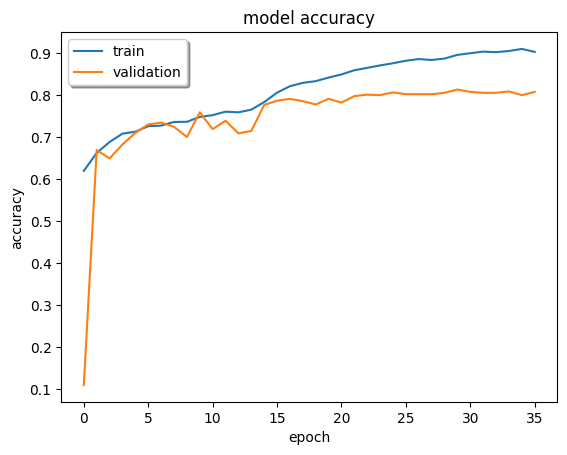

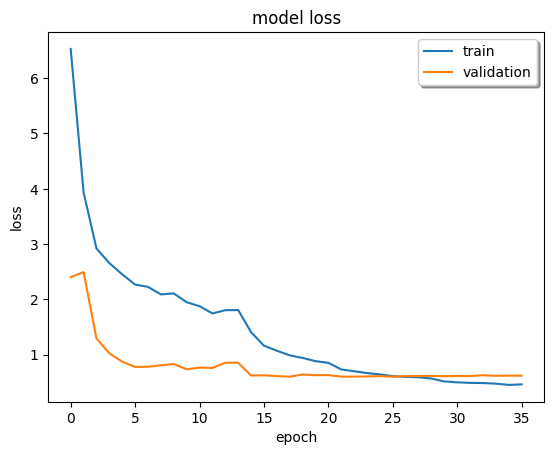

In [ ]:
# summarize history for accuracy
plt.plot(historyCNN2.history['accuracy'])
plt.plot(historyCNN2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left', shadow = True)
plt.show()
# summarize history for loss
plt.plot(historyCNN2.history['loss'])
plt.plot(historyCNN2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best', shadow = True)
plt.show()

In [ ]:
# Make predictions
predictionsCNN = modelCNN2.predict_generator(x_test, verbose=1)

32/32 [==============================] - 2s 61ms/step


In [ ]:
# View the resultd of the predictions 
predictionsCNN

array([[8.1899434e-01, 1.5661384e-01, 1.6766790e-02, ..., 2.6910370e-03,
        4.3452904e-03, 5.0299312e-04],
       [8.6581624e-01, 1.4624799e-02, 1.1777627e-01, ..., 3.9630599e-04,
        1.3189630e-03, 3.8318671e-05],
       [1.0000000e+00, 3.6148196e-11, 6.3459185e-09, ..., 7.8882068e-11,
        1.7572248e-08, 2.9524106e-16],
       ...,
       [9.9998677e-01, 3.9298748e-06, 1.9697411e-06, ..., 5.2048099e-09,
        7.2689368e-06, 1.2199326e-11],
       [3.7003669e-03, 1.2960041e-02, 1.5441725e-02, ..., 5.5679795e-03,
        1.9746443e-02, 2.4897484e-03],
       [9.1022931e-02, 1.6282181e-01, 7.4033988e-01, ..., 5.6444784e-03,
        4.2113505e-05, 2.7013117e-05]], dtype=float32)

In [ ]:
# Convert predicted values from an array to a Dataframe and round up to 4 decimal place
# For each row there are predicted % for each of the classes 0 t0 6
pred_CNN = np.around(pd.DataFrame(predictionsCNN), 4)
pred_CNN

,0,1,2,3,4,5,6
0,0.8190,0.1566,0.0168,0.0001,0.0027,0.0043,0.0005
1,0.8658,0.0146,0.1178,0.0000,0.0004,0.0013,0.0000
2,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9886,0.0007,0.0107,0.0000,0.0000,0.0000,0.0000
4,0.9980,0.0001,0.0001,0.0000,0.0000,0.0018,0.0000
...,...,...,...,...,...,...,...
997,0.0042,0.9802,0.0053,0.0000,0.0103,0.0000,0.0000
998,0.7314,0.2505,0.0178,0.0000,0.0001,0.0002,0.0000
999,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1000,0.0037,0.0130,0.0154,0.9401,0.0056,0.0197,0.0025


In [ ]:
# Obtain the indice of the maximum value for each row
y_pred_CNN = np.argmax(predictionsCNN, axis = 1)
y_pred_CNN

array([0, 0, 0, ..., 0, 3, 2])

**Model Evaluation**

In [ ]:
# Create the confusion matrix 
confusion_matrix(y_pred_CNN, y_idtest)

array([[633,  47,  41,   4,   1,   6,   3],
       [ 19,  52,  14,   4,   1,   3,   2],
       [ 13,   8,  50,   1,   2,   0,   1],
       [  5,   3,   5,  39,   7,   4,   1],
       [  0,   1,   0,   3,  21,   0,   1],
       [  1,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   1,   0,   4]])

In [ ]:
# Determine the accuracy score of the modelCNN
accuracy_score(y_pred_CNN,y_idtest)

0.7984031936127745

In [ ]:
print(classification_report(y_idtest,y_pred_CNN))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       671
           1       0.55      0.47      0.50       111
           2       0.67      0.45      0.54       110
           3       0.61      0.76      0.68        51
           4       0.81      0.64      0.71        33
           5       0.50      0.07      0.12        14
           6       0.80      0.33      0.47        12

    accuracy                           0.80      1002
   macro avg       0.68      0.52      0.56      1002
weighted avg       0.78      0.80      0.78      1002



In [ ]:
# Show the accuracy of the model by class for each of the lesion in the dataset
class_accuracy_CNN = []

for i in range(7):
    acc = round(np.mean(y_idtest[y_idtest == i] == y_pred_CNN[y_idtest == i]),2)
    lab_name = lesion_names[i]
    print('The Model accuracy for ',lab_name,'=',acc)
    class_accuracy_CNN.append(acc)

The Model accuracy for  Melanocytic nevi = 0.94
The Model accuracy for  Melanoma = 0.47
The Model accuracy for  Benign keratosis-like lesions  = 0.45
The Model accuracy for  Basal cell carcinoma = 0.76
The Model accuracy for  Actinic keratoses = 0.64
The Model accuracy for  Vascular lesions = 0.07
The Model accuracy for  Dermatofibroma = 0.33


In [ ]:
# Get the tabulated visualization of the Model's accuracy for each lesion 
acc_tab = pd.DataFrame(list(zip(lesion_ID_dict, class_accuracy_CNN)))
acc_tab.columns = ["Lesion", "Accuracy"]
acc_tab

,Lesion,Accuracy
0,nv,0.82
1,mel,0.31
2,bkl,0.46
3,bcc,0.25
4,akiec,0.64
5,vasc,1.00
6,df,0.42


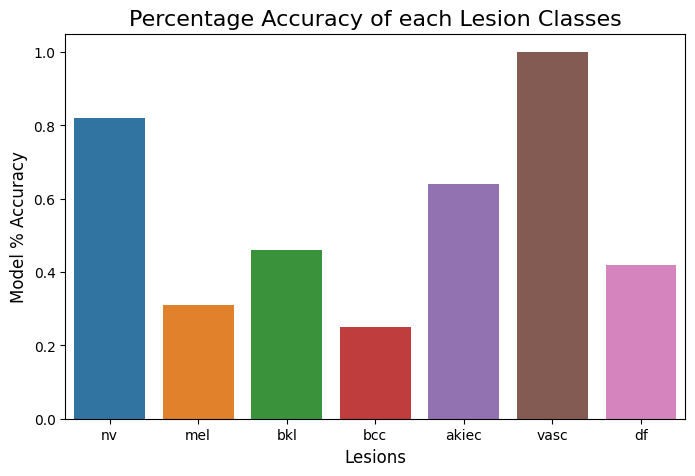

In [ ]:
# Visualise the graphical representation of the % Accuracy of the Model
plt.figure(figsize = (8, 5))
sns.barplot(data=acc_tab, x="Lesion", y= "Accuracy", hue=None)
plt.xlabel('Lesions', size=12)
plt.ylabel('Model % Accuracy', size=12)
plt.title('Percentage Accuracy of each Lesion Classes', size=16)
plt.show()

#### **The CNN model + Dropout + Augmentation + Classweight + Focal loss**

In [ ]:
# Define the focal loss function
def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_func(y_true, y_pred):
        pt = y_pred * y_true + (1 - y_pred) * (1 - y_true)
        w = alpha * y_true + (1 - alpha) * (1 - y_true)
        loss = -K.sum(w * K.pow(1 - pt, gamma) * K.log(pt))
        return loss
    return focal_loss_func

In [ ]:
modelCNN3 = keras.Sequential([
    layers.InputLayer(input_shape=[71, 71, 3]),
    
    # Block One
    layers.BatchNormalization(),
    layers.Conv2D(filters=96, kernel_size=3, activation="relu"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),

    # Block Two
    layers.BatchNormalization(),
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", 
                  padding = "same"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),

    # Block Three
    layers.BatchNormalization(),
    layers.Conv2D(filters=1024, kernel_size=3, activation="relu", 
                  padding = "same"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),
    
    # Block four
    layers.BatchNormalization(),
    layers.Conv2D(filters=1024, kernel_size=3, activation="relu", 
                  padding = "same"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),

    # Flatten
    layers.BatchNormalization(),
    layers.Flatten(),

    # Block Five
    layers.Dense(4096, activation="relu"),
    layers.Dropout(0.5),
    
    # Block Six
    layers.Dense(4096, activation="relu"),
    layers.Dropout(0.5),

    # output
    layers.Dense(7, activation='softmax')
])

In [ ]:
# Compile the model with the class-weighted and focal loss functions
modelCNN3.compile(optimizer='adam',
              loss=focal_loss(),
              metrics=['accuracy'],
              sample_weight_mode='temporal')

In [ ]:
# Get the Summary of the Model
modelCNN3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_5 (Batc  (None, 71, 71, 3)        12        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 69, 69, 96)        2688      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 34, 34, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 34, 34, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 512)       442880    
                                                      

In [ ]:
#Training our CNN
#epochs = 40
historyCNN2 = modelCNN3.fit(x_train,
                     y_train, 
                     epochs=40, 
                     batch_size=90, 
                     class_weight=class_weights, 
                     validation_data=(x_val, y_val),
                     callbacks=callbacks_list)

Epoch 1/40
90/91 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.6693
Epoch 1: val_accuracy did not improve from 0.84146
91/91 [==============================] - 26s 284ms/step - loss: nan - accuracy: 0.6695 - val_loss: nan - val_accuracy: 0.6696 - lr: 3.1623e-04
Epoch 2/40
91/91 [==============================] - ETA: 0s - loss: nan - accuracy: 0.6695
Epoch 2: val_accuracy did not improve from 0.84146
91/91 [==============================] - 21s 233ms/step - loss: nan - accuracy: 0.6695 - val_loss: nan - val_accuracy: 0.6696 - lr: 3.1623e-04
Epoch 3/40
91/91 [==============================] - ETA: 0s - loss: nan - accuracy: 0.6695
Epoch 3: val_accuracy did not improve from 0.84146
91/91 [==============================] - 35s 388ms/step - loss: nan - accuracy: 0.6695 - val_loss: nan - val_accuracy: 0.6696 - lr: 3.1623e-04
Epoch 4/40
91/91 [==============================] - ETA: 0s - loss: nan - accuracy: 0.6695
Epoch 4: val_accuracy did not improve from 0.84146
91/

In [ ]:
# View the tabulated result of the loss and accuracy values
pd.DataFrame(historyCNN2.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,6.528395,0.620022,2.402687,0.109756,0.001000
1,3.935158,0.662680,2.494741,0.669623,0.001000
2,2.921967,0.688818,1.297936,0.649667,0.001000
3,2.657261,0.708667,1.024862,0.682927,0.001000
4,2.453015,0.713352,0.875250,0.710643,0.001000
5,2.269111,0.726421,0.780781,0.730599,0.001000
6,2.227544,0.727900,0.783697,0.735033,0.001000
7,2.091208,0.736531,0.810174,0.725055,0.001000
8,2.109581,0.736901,0.833272,0.700665,0.001000
9,1.949993,0.748490,0.737914,0.759423,0.001000


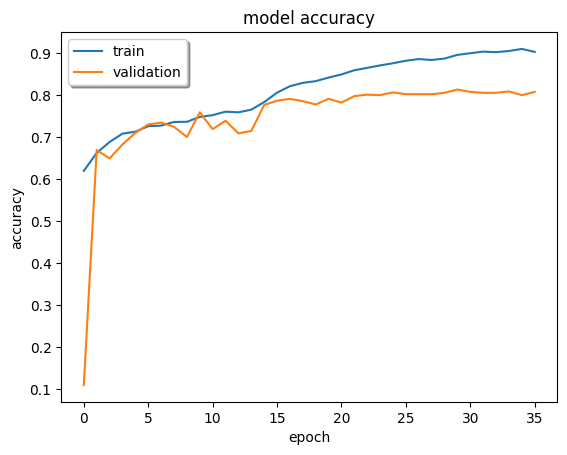

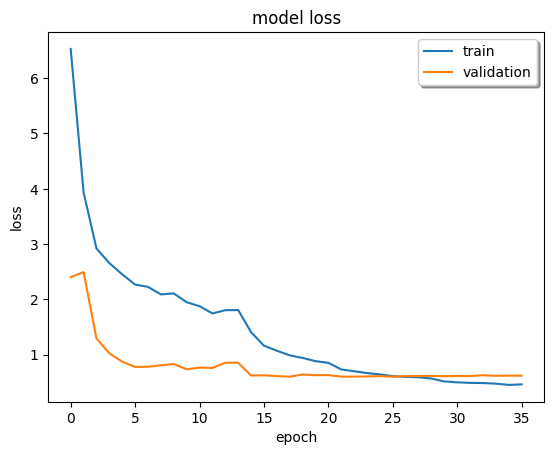

In [ ]:
# summarize history for accuracy
plt.plot(historyCNN2.history['accuracy'])
plt.plot(historyCNN2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left', shadow = True)
plt.show()
# summarize history for loss
plt.plot(historyCNN2.history['loss'])
plt.plot(historyCNN2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best', shadow = True)
plt.show()

In [ ]:
# Make predictions
predictionsCNN = modelCNN2.predict_generator(x_test, verbose=1)

32/32 [==============================] - 2s 61ms/step


In [ ]:
# View the resultd of the predictions 
predictionsCNN

array([[8.1899434e-01, 1.5661384e-01, 1.6766790e-02, ..., 2.6910370e-03,
        4.3452904e-03, 5.0299312e-04],
       [8.6581624e-01, 1.4624799e-02, 1.1777627e-01, ..., 3.9630599e-04,
        1.3189630e-03, 3.8318671e-05],
       [1.0000000e+00, 3.6148196e-11, 6.3459185e-09, ..., 7.8882068e-11,
        1.7572248e-08, 2.9524106e-16],
       ...,
       [9.9998677e-01, 3.9298748e-06, 1.9697411e-06, ..., 5.2048099e-09,
        7.2689368e-06, 1.2199326e-11],
       [3.7003669e-03, 1.2960041e-02, 1.5441725e-02, ..., 5.5679795e-03,
        1.9746443e-02, 2.4897484e-03],
       [9.1022931e-02, 1.6282181e-01, 7.4033988e-01, ..., 5.6444784e-03,
        4.2113505e-05, 2.7013117e-05]], dtype=float32)

In [ ]:
# Convert predicted values from an array to a Dataframe and round up to 4 decimal place
# For each row there are predicted % for each of the classes 0 t0 6
pred_CNN = np.around(pd.DataFrame(predictionsCNN), 4)
pred_CNN

,0,1,2,3,4,5,6
0,0.8190,0.1566,0.0168,0.0001,0.0027,0.0043,0.0005
1,0.8658,0.0146,0.1178,0.0000,0.0004,0.0013,0.0000
2,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9886,0.0007,0.0107,0.0000,0.0000,0.0000,0.0000
4,0.9980,0.0001,0.0001,0.0000,0.0000,0.0018,0.0000
...,...,...,...,...,...,...,...
997,0.0042,0.9802,0.0053,0.0000,0.0103,0.0000,0.0000
998,0.7314,0.2505,0.0178,0.0000,0.0001,0.0002,0.0000
999,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1000,0.0037,0.0130,0.0154,0.9401,0.0056,0.0197,0.0025


In [ ]:
# Obtain the indice of the maximum value for each row
y_pred_CNN = np.argmax(predictionsCNN, axis = 1)
y_pred_CNN

array([0, 0, 0, ..., 0, 3, 2])

**Model Evaluation**

In [ ]:
# Create the confusion matrix 
confusion_matrix(y_pred_CNN, y_idtest)

array([[633,  47,  41,   4,   1,   6,   3],
       [ 19,  52,  14,   4,   1,   3,   2],
       [ 13,   8,  50,   1,   2,   0,   1],
       [  5,   3,   5,  39,   7,   4,   1],
       [  0,   1,   0,   3,  21,   0,   1],
       [  1,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   1,   0,   4]])

In [ ]:
# Determine the accuracy score of the modelCNN
accuracy_score(y_pred_CNN,y_idtest)

0.7984031936127745

In [ ]:
print(classification_report(y_idtest,y_pred_CNN))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       671
           1       0.55      0.47      0.50       111
           2       0.67      0.45      0.54       110
           3       0.61      0.76      0.68        51
           4       0.81      0.64      0.71        33
           5       0.50      0.07      0.12        14
           6       0.80      0.33      0.47        12

    accuracy                           0.80      1002
   macro avg       0.68      0.52      0.56      1002
weighted avg       0.78      0.80      0.78      1002



In [ ]:
# Show the accuracy of the model by class for each of the lesion in the dataset
class_accuracy_CNN = []

for i in range(7):
    acc = round(np.mean(y_idtest[y_idtest == i] == y_pred_CNN[y_idtest == i]),2)
    lab_name = lesion_names[i]
    print('The Model accuracy for ',lab_name,'=',acc)
    class_accuracy_CNN.append(acc)

The Model accuracy for  Melanocytic nevi = 0.94
The Model accuracy for  Melanoma = 0.47
The Model accuracy for  Benign keratosis-like lesions  = 0.45
The Model accuracy for  Basal cell carcinoma = 0.76
The Model accuracy for  Actinic keratoses = 0.64
The Model accuracy for  Vascular lesions = 0.07
The Model accuracy for  Dermatofibroma = 0.33


In [ ]:
# Get the tabulated visualization of the Model's accuracy for each lesion 
acc_tab = pd.DataFrame(list(zip(lesion_ID_dict, class_accuracy_CNN)))
acc_tab.columns = ["Lesion", "Accuracy"]
acc_tab

,Lesion,Accuracy
0,nv,0.82
1,mel,0.31
2,bkl,0.46
3,bcc,0.25
4,akiec,0.64
5,vasc,1.00
6,df,0.42


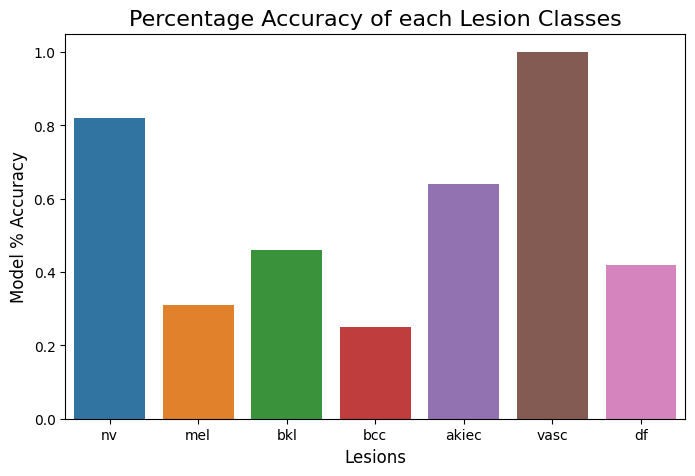

In [ ]:
# Visualise the graphical representation of the % Accuracy of the Model
plt.figure(figsize = (8, 5))
sns.barplot(data=acc_tab, x="Lesion", y= "Accuracy", hue=None)
plt.xlabel('Lesions', size=12)
plt.ylabel('Model % Accuracy', size=12)
plt.title('Percentage Accuracy of each Lesion Classes', size=16)
plt.show()

#### **With Attention**

In [ ]:
from keras.layers import Layer

In [ ]:
# Define the input shape
input_shape = (71, 71, 3)

# Define the number of classes
num_classes = 7

# Imput tensor 
input_tensor = Input(shape = input_shape)

In [ ]:
# Add attention layer to the deep learning network
class att (Layer):
    def __init__(self,**kwargs):
        super(att,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(att, self).build(input_shape)

    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

In [ ]:
    x=Input(shape=input_shape)
    CNN_layer = Conv2D(96, (3, 3),  padding = "same", activation="relu")(x)
    CNN_layer = MaxPooling2D((2, 2))(CNN_layer)

    CNN_layer = BatchNormalization()(CNN_layer)
    CNN_layer = Conv2D(filters=512, kernel_size=3, activation="relu", padding = "same")(CNN_layer)
    CNN_layer = MaxPooling2D(pool_size = (3, 3), strides = (2, 2))(CNN_layer)

    CNN_layer = BatchNormalization()(CNN_layer)
    CNN_layer = Conv2D(1024, (3, 3), padding='same', activation='relu')(CNN_layer)
    CNN_layer = MaxPooling2D((2, 2))(CNN_layer)

    CNN_layer = BatchNormalization()(CNN_layer)
    CNN_layer = Conv2D(1024, (3, 3), padding='same', activation='relu')(CNN_layer)
    CNN_layer = MaxPooling2D((2, 2))(CNN_layer)

    attention_layer = att()(CNN_layer)
    attention_layer = Flatten()(attention_layer)
    attention_layer = Dropout(0.2)(attention_layer)
    outputs=Dense(7, trainable=True, activation="softmax")(attention_layer)
    model=Model(x,outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 71, 71, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 71, 71, 96)        2688      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 35, 35, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 35, 35, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 35, 35, 512)       442880    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 512)      0     

In [ ]:
#Training our Model
#epochs = 40
history = model.fit(x_train,
                     y_train, 
                     epochs=40, 
                     batch_size=90, 
                     class_weight = class_weights, 
                     validation_data=(x_val, y_val),
                     callbacks=callbacks_list)

Epoch 1/40
91/91 [==============================] - ETA: 0s - loss: 16.4576 - accuracy: 0.6065
Epoch 1: val_accuracy improved from -inf to 0.05100, saving model to model_HAM10000_images


91/91 [==============================] - 95s 826ms/step - loss: 16.4576 - accuracy: 0.6065 - val_loss: 5.2059 - val_accuracy: 0.0510 - lr: 0.0010
Epoch 2/40
91/91 [==============================] - ETA: 0s - loss: 9.5221 - accuracy: 0.6204
Epoch 2: val_accuracy improved from 0.05100 to 0.66408, saving model to model_HAM10000_images


91/91 [==============================] - 71s 790ms/step - loss: 9.5221 - accuracy: 0.6204 - val_loss: 1.5653 - val_accuracy: 0.6641 - lr: 0.0010
Epoch 3/40
90/91 [============================>.] - ETA: 0s - loss: 3.9711 - accuracy: 0.6626
Epoch 3: val_accuracy did not improve from 0.66408
91/91 [==============================] - 64s 709ms/step - loss: 3.9699 - accuracy: 0.6623 - val_loss: 1.4879 - val_accuracy: 0.6197 - lr: 0.0010
Epoch 4/40
91/91 [==============================] - ETA: 0s - loss: 3.0736 - accuracy: 0.6799
Epoch 4: val_accuracy did not improve from 0.66408
91/91 [==============================] - 64s 708ms/step - loss: 3.0736 - accuracy: 0.6799 - val_loss: 2.4447 - val_accuracy: 0.0510 - lr: 0.0010
Epoch 5/40
90/91 [============================>.] - ETA: 0s - loss: 3.3133 - accuracy: 0.6800
Epoch 5: val_accuracy did not improve from 0.66408
91/91 [==============================] - 65s 721ms/step - loss: 3.3103 - accuracy: 0.6802 - val_loss: 4.0126 - val_accuracy: 0.352

91/91 [==============================] - 67s 745ms/step - loss: 2.3924 - accuracy: 0.7093 - val_loss: 0.8656 - val_accuracy: 0.6996 - lr: 3.1623e-04
Epoch 9/40
91/91 [==============================] - ETA: 0s - loss: 2.2712 - accuracy: 0.7129
Epoch 9: val_accuracy improved from 0.69956 to 0.72173, saving model to model_HAM10000_images


91/91 [==============================] - 70s 779ms/step - loss: 2.2712 - accuracy: 0.7129 - val_loss: 0.8298 - val_accuracy: 0.7217 - lr: 3.1623e-04
Epoch 10/40
90/91 [============================>.] - ETA: 0s - loss: 2.2341 - accuracy: 0.7204
Epoch 10: val_accuracy did not improve from 0.72173
91/91 [==============================] - 61s 675ms/step - loss: 2.2333 - accuracy: 0.7204 - val_loss: 0.9022 - val_accuracy: 0.7073 - lr: 3.1623e-04
Epoch 11/40
91/91 [==============================] - ETA: 0s - loss: 2.2066 - accuracy: 0.7253
Epoch 11: val_accuracy did not improve from 0.72173
91/91 [==============================] - 65s 719ms/step - loss: 2.2066 - accuracy: 0.7253 - val_loss: 0.9931 - val_accuracy: 0.6962 - lr: 3.1623e-04
Epoch 12/40
91/91 [==============================] - ETA: 0s - loss: 2.2812 - accuracy: 0.7231
Epoch 12: val_accuracy did not improve from 0.72173
91/91 [==============================] - 62s 688ms/step - loss: 2.2812 - accuracy: 0.7231 - val_loss: 0.9964 - v

91/91 [==============================] - 67s 745ms/step - loss: 2.0917 - accuracy: 0.7343 - val_loss: 0.9839 - val_accuracy: 0.7251 - lr: 3.1623e-04
Epoch 14/40
91/91 [==============================] - ETA: 0s - loss: 2.0188 - accuracy: 0.7380
Epoch 14: val_accuracy did not improve from 0.72506
91/91 [==============================] - 61s 670ms/step - loss: 2.0188 - accuracy: 0.7380 - val_loss: 0.8425 - val_accuracy: 0.7084 - lr: 3.1623e-04
Epoch 15/40
90/91 [============================>.] - ETA: 0s - loss: 1.9364 - accuracy: 0.7468
Epoch 15: val_accuracy did not improve from 0.72506
91/91 [==============================] - 54s 603ms/step - loss: 1.9376 - accuracy: 0.7468 - val_loss: 0.7482 - val_accuracy: 0.7206 - lr: 3.1623e-04
Epoch 16/40
90/91 [============================>.] - ETA: 0s - loss: 1.8917 - accuracy: 0.7460
Epoch 16: val_accuracy improved from 0.72506 to 0.74169, saving model to model_HAM10000_images


91/91 [==============================] - 63s 693ms/step - loss: 1.8933 - accuracy: 0.7459 - val_loss: 0.7370 - val_accuracy: 0.7417 - lr: 3.1623e-04
Epoch 17/40
90/91 [============================>.] - ETA: 0s - loss: 1.8323 - accuracy: 0.7554
Epoch 17: val_accuracy did not improve from 0.74169
91/91 [==============================] - 56s 619ms/step - loss: 1.8316 - accuracy: 0.7555 - val_loss: 0.8050 - val_accuracy: 0.7140 - lr: 3.1623e-04
Epoch 18/40
90/91 [============================>.] - ETA: 0s - loss: 1.7458 - accuracy: 0.7622
Epoch 18: val_accuracy did not improve from 0.74169
91/91 [==============================] - 60s 665ms/step - loss: 1.7458 - accuracy: 0.7622 - val_loss: 0.7864 - val_accuracy: 0.7284 - lr: 3.1623e-04
Epoch 19/40
91/91 [==============================] - ETA: 0s - loss: 1.7510 - accuracy: 0.7617
Epoch 19: val_accuracy improved from 0.74169 to 0.74279, saving model to model_HAM10000_images


91/91 [==============================] - 66s 727ms/step - loss: 1.7510 - accuracy: 0.7617 - val_loss: 0.7993 - val_accuracy: 0.7428 - lr: 3.1623e-04
Epoch 20/40
90/91 [============================>.] - ETA: 0s - loss: 1.6599 - accuracy: 0.7795
Epoch 20: val_accuracy did not improve from 0.74279
91/91 [==============================] - 64s 710ms/step - loss: 1.6619 - accuracy: 0.7793 - val_loss: 0.7875 - val_accuracy: 0.7184 - lr: 3.1623e-04
Epoch 21/40
90/91 [============================>.] - ETA: 0s - loss: 1.6702 - accuracy: 0.7727
Epoch 21: val_accuracy did not improve from 0.74279
91/91 [==============================] - 60s 664ms/step - loss: 1.6700 - accuracy: 0.7729 - val_loss: 0.7743 - val_accuracy: 0.7284 - lr: 3.1623e-04
Epoch 22/40
91/91 [==============================] - ETA: 0s - loss: 1.5792 - accuracy: 0.7786
Epoch 22: val_accuracy improved from 0.74279 to 0.74945, saving model to model_HAM10000_images


91/91 [==============================] - 64s 713ms/step - loss: 1.5792 - accuracy: 0.7786 - val_loss: 0.7563 - val_accuracy: 0.7494 - lr: 3.1623e-04
Epoch 23/40
91/91 [==============================] - ETA: 0s - loss: 1.7310 - accuracy: 0.7740
Epoch 23: val_accuracy did not improve from 0.74945
91/91 [==============================] - 66s 730ms/step - loss: 1.7310 - accuracy: 0.7740 - val_loss: 0.9248 - val_accuracy: 0.7273 - lr: 3.1623e-04
Epoch 24/40
90/91 [============================>.] - ETA: 0s - loss: 1.5500 - accuracy: 0.7807
Epoch 24: val_accuracy improved from 0.74945 to 0.75499, saving model to model_HAM10000_images


91/91 [==============================] - 70s 771ms/step - loss: 1.5492 - accuracy: 0.7809 - val_loss: 0.7079 - val_accuracy: 0.7550 - lr: 3.1623e-04
Epoch 25/40
90/91 [============================>.] - ETA: 0s - loss: 1.4280 - accuracy: 0.7965
Epoch 25: val_accuracy did not improve from 0.75499
91/91 [==============================] - 63s 698ms/step - loss: 1.4290 - accuracy: 0.7964 - val_loss: 0.7422 - val_accuracy: 0.7306 - lr: 3.1623e-04
Epoch 26/40
91/91 [==============================] - ETA: 0s - loss: 1.4116 - accuracy: 0.7995
Epoch 26: val_accuracy did not improve from 0.75499
91/91 [==============================] - 67s 741ms/step - loss: 1.4116 - accuracy: 0.7995 - val_loss: 1.0441 - val_accuracy: 0.6929 - lr: 3.1623e-04
Epoch 27/40
90/91 [============================>.] - ETA: 0s - loss: 1.8314 - accuracy: 0.7670
Epoch 27: val_accuracy improved from 0.75499 to 0.76053, saving model to model_HAM10000_images


91/91 [==============================] - 65s 726ms/step - loss: 1.8331 - accuracy: 0.7667 - val_loss: 0.8082 - val_accuracy: 0.7605 - lr: 3.1623e-04
Epoch 28/40
91/91 [==============================] - ETA: 0s - loss: 1.5323 - accuracy: 0.7904
Epoch 28: val_accuracy did not improve from 0.76053
91/91 [==============================] - 60s 659ms/step - loss: 1.5323 - accuracy: 0.7904 - val_loss: 0.9181 - val_accuracy: 0.7483 - lr: 3.1623e-04
Epoch 29/40
91/91 [==============================] - ETA: 0s - loss: 1.3890 - accuracy: 0.8075
Epoch 29: val_accuracy did not improve from 0.76053
91/91 [==============================] - 55s 609ms/step - loss: 1.3890 - accuracy: 0.8075 - val_loss: 1.0878 - val_accuracy: 0.7306 - lr: 3.1623e-04
Epoch 30/40
91/91 [==============================] - ETA: 0s - loss: 1.3557 - accuracy: 0.8027
Epoch 30: val_accuracy improved from 0.76053 to 0.76497, saving model to model_HAM10000_images


91/91 [==============================] - 69s 767ms/step - loss: 1.3557 - accuracy: 0.8027 - val_loss: 0.7801 - val_accuracy: 0.7650 - lr: 3.1623e-04
Epoch 31/40
91/91 [==============================] - ETA: 0s - loss: 1.2596 - accuracy: 0.8181
Epoch 31: val_accuracy did not improve from 0.76497
91/91 [==============================] - 70s 775ms/step - loss: 1.2596 - accuracy: 0.8181 - val_loss: 0.7712 - val_accuracy: 0.7461 - lr: 3.1623e-04
Epoch 32/40
91/91 [==============================] - ETA: 0s - loss: 1.2471 - accuracy: 0.8243
Epoch 32: val_accuracy improved from 0.76497 to 0.76608, saving model to model_HAM10000_images


91/91 [==============================] - 55s 613ms/step - loss: 1.2471 - accuracy: 0.8243 - val_loss: 0.7805 - val_accuracy: 0.7661 - lr: 3.1623e-04
Epoch 33/40
91/91 [==============================] - ETA: 0s - loss: 1.0794 - accuracy: 0.8389
Epoch 33: val_accuracy did not improve from 0.76608
91/91 [==============================] - 63s 697ms/step - loss: 1.0794 - accuracy: 0.8389 - val_loss: 0.7687 - val_accuracy: 0.7450 - lr: 3.1623e-04
Epoch 34/40
91/91 [==============================] - ETA: 0s - loss: 0.9707 - accuracy: 0.8479
Epoch 34: val_accuracy improved from 0.76608 to 0.76829, saving model to model_HAM10000_images


91/91 [==============================] - 62s 692ms/step - loss: 0.9707 - accuracy: 0.8479 - val_loss: 0.7927 - val_accuracy: 0.7683 - lr: 3.1623e-04
Epoch 35/40
90/91 [============================>.] - ETA: 0s - loss: 1.1721 - accuracy: 0.8364
Epoch 35: val_accuracy did not improve from 0.76829
91/91 [==============================] - 55s 614ms/step - loss: 1.1710 - accuracy: 0.8366 - val_loss: 1.2421 - val_accuracy: 0.7284 - lr: 3.1623e-04
Epoch 36/40
91/91 [==============================] - ETA: 0s - loss: 0.9582 - accuracy: 0.8503
Epoch 36: val_accuracy improved from 0.76829 to 0.76940, saving model to model_HAM10000_images


91/91 [==============================] - 61s 681ms/step - loss: 0.9582 - accuracy: 0.8503 - val_loss: 0.7243 - val_accuracy: 0.7694 - lr: 3.1623e-04
Epoch 37/40
90/91 [============================>.] - ETA: 0s - loss: 0.8480 - accuracy: 0.8652
Epoch 37: val_accuracy improved from 0.76940 to 0.77938, saving model to model_HAM10000_images


91/91 [==============================] - 64s 712ms/step - loss: 0.8486 - accuracy: 0.8649 - val_loss: 0.7080 - val_accuracy: 0.7794 - lr: 3.1623e-04
Epoch 38/40
90/91 [============================>.] - ETA: 0s - loss: 0.7794 - accuracy: 0.8744
Epoch 38: val_accuracy improved from 0.77938 to 0.78603, saving model to model_HAM10000_images


91/91 [==============================] - 61s 680ms/step - loss: 0.7788 - accuracy: 0.8746 - val_loss: 0.7161 - val_accuracy: 0.7860 - lr: 3.1623e-04
Epoch 39/40
91/91 [==============================] - ETA: 0s - loss: 0.6861 - accuracy: 0.8858
Epoch 39: val_accuracy did not improve from 0.78603
91/91 [==============================] - 57s 632ms/step - loss: 0.6861 - accuracy: 0.8858 - val_loss: 0.7187 - val_accuracy: 0.7705 - lr: 3.1623e-04
Epoch 40/40
91/91 [==============================] - ETA: 0s - loss: 0.6363 - accuracy: 0.8904
Epoch 40: val_accuracy did not improve from 0.78603
91/91 [==============================] - 64s 709ms/step - loss: 0.6363 - accuracy: 0.8904 - val_loss: 0.8366 - val_accuracy: 0.7206 - lr: 3.1623e-04


In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,16.457550,0.606460,5.205878,0.050998,0.001000
1,9.522099,0.620392,1.565298,0.664080,0.001000
2,3.969915,0.662310,1.487864,0.619734,0.001000
3,3.073591,0.679941,2.444682,0.050998,0.001000
4,3.310349,0.680187,4.012557,0.352550,0.001000
5,4.154743,0.663420,1.312167,0.604213,0.001000
6,4.017044,0.685366,1.195714,0.583149,0.000316
7,2.392447,0.709284,0.865577,0.699557,0.000316
8,2.271184,0.712859,0.829788,0.721730,0.000316
9,2.233304,0.720380,0.902218,0.707317,0.000316


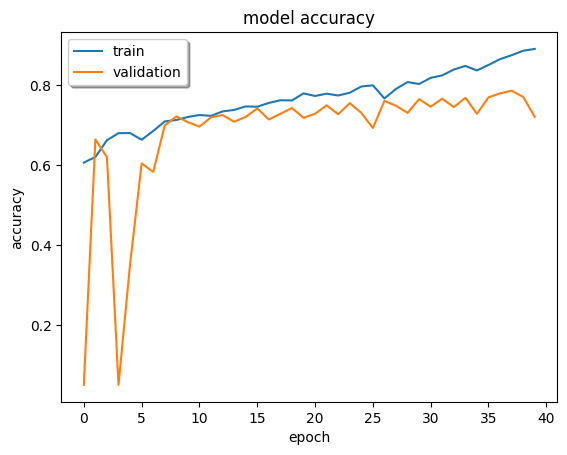

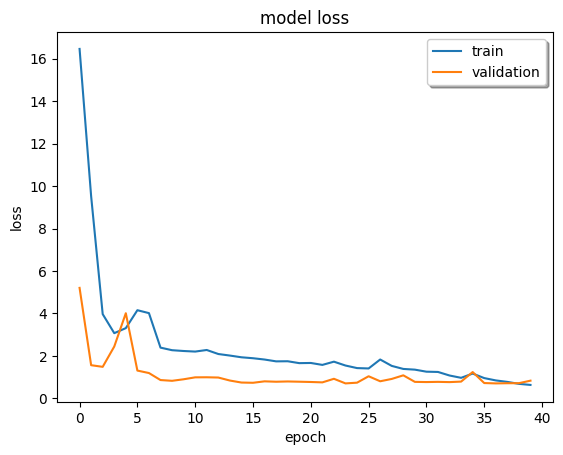

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left', shadow = True)
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best', shadow = True)
plt.show()

In [ ]:
# Make predictions
predictions_att = model.predict_generator(x_test, verbose=1)

<ipython-input-74-a3fd8fe88e66>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_att = model.predict_generator(x_test, verbose=1)


32/32 [==============================] - 5s 111ms/step


In [ ]:
# Convert predicted values from an array to a Dataframe and round up to 4 decimal place
# For each row there are predicted % for each of the classes 0 t0 6
pred_att = np.around(pd.DataFrame(predictions_att), 4)
pred_att

,0,1,2,3,4,5,6
0,0.9585,0.0393,0.0021,0.0000,0.0000,0.0000,0.0000
1,0.7397,0.2250,0.0333,0.0008,0.0005,0.0007,0.0000
2,0.9970,0.0022,0.0007,0.0001,0.0000,0.0000,0.0000
3,0.9982,0.0006,0.0011,0.0000,0.0000,0.0000,0.0000
4,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...
997,0.0663,0.8760,0.0123,0.0000,0.0453,0.0000,0.0000
998,0.6460,0.3540,0.0000,0.0000,0.0000,0.0000,0.0000
999,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1000,0.1024,0.1231,0.0289,0.7397,0.0015,0.0001,0.0042


In [ ]:
# Obtain the indice of the maximum value for each row
y_pred_att = np.argmax(predictions_att, axis = 1)
y_pred_att

array([0, 0, 0, ..., 0, 3, 2])

In [ ]:
# Create the confusion matrix 
confusion_matrix(y_pred_att, y_idtest)

array([[575,  38,  25,   2,   0,   5,   3],
       [ 62,  65,  18,   4,   2,   1,   0],
       [ 12,   4,  48,   1,   4,   0,   1],
       [ 21,   3,  18,  40,  16,   3,   6],
       [  1,   1,   1,   4,  11,   0,   1],
       [  0,   0,   0,   0,   0,   5,   0],
       [  0,   0,   0,   0,   0,   0,   1]])

In [ ]:
print(classification_report(y_idtest,y_pred_att))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       671
           1       0.43      0.59      0.49       111
           2       0.69      0.44      0.53       110
           3       0.37      0.78      0.51        51
           4       0.58      0.33      0.42        33
           5       1.00      0.36      0.53        14
           6       1.00      0.08      0.15        12

    accuracy                           0.74      1002
   macro avg       0.71      0.49      0.50      1002
weighted avg       0.78      0.74      0.75      1002



In [ ]:
# Show the accuracy of the model by class for each of the lesion in the dataset
class_accuracy_att = []

for i in range(7):
    acc = round(np.mean(y_idtest[y_idtest == i] == y_pred_att[y_idtest == i]),2)
    lab_name = lesion_names[i]
    print('The Model accuracy for ',lab_name,'=',acc)
    class_accuracy_att.append(acc)

In [ ]:
class_accuracy_att

In [ ]:
# Get the tabulated visualization of the Model's accuracy for each lesion 
acc_tab = pd.DataFrame(list(zip(lesion_ID_dict, class_accuracy_att)))
acc_tab.columns = ["Lesion", "Accuracy"]
acc_tab

In [ ]:
# Visualise the graphical representation of the % Accuracy of the Model
plt.figure(figsize = (8, 5))
sns.barplot(data=acc_tab, x="Lesion", y= "Accuracy", hue=None)
plt.xlabel('Lesions', size=12)
plt.ylabel('Model % Accuracy', size=12)
plt.title('Percentage Accuracy of each Lesion Classes', size=16)
plt.show()

In [ ]:
# Visualize the Image and it's predictions 
plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    index = i+100
    plt.imshow(x_test[index,:,:,::-1])
    label_exp = lesion_names[y_idtest[index]]  #expected label
    label_pred = lesion_names[y_pred_att[index]]  #predicted label
    #label_pred_prob = round(np.max(y_pred_prob[index])*100)
    plt.title('Expected:'+str(label_exp)+'\n Pred.:'+str(label_pred))  
    plt.ylabel('')
    plt.tight_layout()
    plt.savefig('final_figure.png',dpi=300)
plt.show()

### **Model 2**

#### **Using Xception Model**

In [ ]:
# Defining base model using Xception module from Keras
from keras.applications import Xception

training_shape = (71,71,3)
base_model = Xception(include_top=False,weights='imagenet',input_shape = training_shape)
for layer in base_model.layers:
    layer.trainable = True 

83683744/83683744 [==============================] - 4s 0us/step


In [ ]:
#Adding layers at end
n_classes = 7
model = base_model.output

model = Flatten()(model)

model = Dense(128)(model)
model = Dropout(0.5)(model)
model = BatchNormalization()(model)
model = Activation('relu')(model)

output = Dense(n_classes, activation='softmax')(model)
model = Model(inputs=base_model.input, outputs=output)

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer= "adam", 
              metrics=['accuracy'])

In [ ]:
# Model Summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 71, 71, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 35, 35, 32)   864         ['input_7[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 35, 35, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                                  
 block1_conv1_act (Activation)  (None, 35, 35, 32)   0           ['block1_conv1_bn[0][0]']    

In [ ]:
# Declare the filepath for the saved model
filepath = "model_HAM10000_Xcept"

In [ ]:
#Training our Model
epochs = 40
historyXcept = model.fit(x_train,y_train, 
                    epochs=epochs, 
                    batch_size=90, 
                    #sample_weight=sample_weights,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks_list)

Epoch 1/40
91/91 [==============================] - ETA: 0s - loss: 1.0076 - accuracy: 0.6750
Epoch 1: val_accuracy did not improve from 0.78603
91/91 [==============================] - 114s 852ms/step - loss: 1.0076 - accuracy: 0.6750 - val_loss: 1.0841 - val_accuracy: 0.7106 - lr: 0.0010
Epoch 2/40
90/91 [============================>.] - ETA: 0s - loss: 0.6083 - accuracy: 0.7902
Epoch 2: val_accuracy did not improve from 0.78603
91/91 [==============================] - 61s 676ms/step - loss: 0.6095 - accuracy: 0.7900 - val_loss: 1.2787 - val_accuracy: 0.6652 - lr: 0.0010
Epoch 3/40
91/91 [==============================] - ETA: 0s - loss: 0.4583 - accuracy: 0.8507
Epoch 3: val_accuracy did not improve from 0.78603
91/91 [==============================] - 72s 798ms/step - loss: 0.4583 - accuracy: 0.8507 - val_loss: 0.9651 - val_accuracy: 0.7062 - lr: 0.0010
Epoch 4/40
90/91 [============================>.] - ETA: 0s - loss: 0.3457 - accuracy: 0.8909
Epoch 4: val_accuracy did not impro

91/91 [==============================] - 104s 1s/step - loss: 0.2585 - accuracy: 0.9167 - val_loss: 0.9159 - val_accuracy: 0.7894 - lr: 0.0010
Epoch 6/40
91/91 [==============================] - ETA: 0s - loss: 0.2387 - accuracy: 0.9204
Epoch 6: val_accuracy did not improve from 0.78936
91/91 [==============================] - 76s 842ms/step - loss: 0.2387 - accuracy: 0.9204 - val_loss: 1.2687 - val_accuracy: 0.7140 - lr: 0.0010
Epoch 7/40
91/91 [==============================] - ETA: 0s - loss: 0.1756 - accuracy: 0.9480
Epoch 7: val_accuracy did not improve from 0.78936
91/91 [==============================] - 67s 747ms/step - loss: 0.1756 - accuracy: 0.9480 - val_loss: 1.0404 - val_accuracy: 0.7417 - lr: 0.0010
Epoch 8/40
90/91 [============================>.] - ETA: 0s - loss: 0.1830 - accuracy: 0.9409
Epoch 8: val_accuracy improved from 0.78936 to 0.80488, saving model to model_HAM10000_images


91/91 [==============================] - 95s 1s/step - loss: 0.1836 - accuracy: 0.9406 - val_loss: 0.7783 - val_accuracy: 0.8049 - lr: 0.0010
Epoch 9/40
91/91 [==============================] - ETA: 0s - loss: 0.1135 - accuracy: 0.9662
Epoch 9: val_accuracy did not improve from 0.80488
91/91 [==============================] - 70s 770ms/step - loss: 0.1135 - accuracy: 0.9662 - val_loss: 0.7728 - val_accuracy: 0.7894 - lr: 0.0010
Epoch 10/40
90/91 [============================>.] - ETA: 0s - loss: 0.0861 - accuracy: 0.9759
Epoch 10: val_accuracy did not improve from 0.80488
91/91 [==============================] - 61s 677ms/step - loss: 0.0867 - accuracy: 0.9758 - val_loss: 0.9650 - val_accuracy: 0.7661 - lr: 0.0010
Epoch 11/40
90/91 [============================>.] - ETA: 0s - loss: 0.0744 - accuracy: 0.9774
Epoch 11: val_accuracy did not improve from 0.80488
91/91 [==============================] - 67s 742ms/step - loss: 0.0757 - accuracy: 0.9773 - val_loss: 0.7346 - val_accuracy: 0.80

91/91 [==============================] - 92s 1s/step - loss: 0.0303 - accuracy: 0.9927 - val_loss: 0.6720 - val_accuracy: 0.8226 - lr: 3.1623e-04
Epoch 14/40
91/91 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 0.9978
Epoch 14: val_accuracy did not improve from 0.82262
91/91 [==============================] - 60s 661ms/step - loss: 0.0125 - accuracy: 0.9978 - val_loss: 0.6275 - val_accuracy: 0.8226 - lr: 3.1623e-04
Epoch 15/40
90/91 [============================>.] - ETA: 0s - loss: 0.0098 - accuracy: 0.9985
Epoch 15: val_accuracy improved from 0.82262 to 0.83814, saving model to model_HAM10000_images


91/91 [==============================] - 80s 885ms/step - loss: 0.0101 - accuracy: 0.9984 - val_loss: 0.6560 - val_accuracy: 0.8381 - lr: 3.1623e-04
Epoch 16/40
91/91 [==============================] - ETA: 0s - loss: 0.0322 - accuracy: 0.9932
Epoch 16: val_accuracy did not improve from 0.83814
91/91 [==============================] - 56s 620ms/step - loss: 0.0322 - accuracy: 0.9932 - val_loss: 0.6711 - val_accuracy: 0.8226 - lr: 3.1623e-04
Epoch 17/40
90/91 [============================>.] - ETA: 0s - loss: 0.0120 - accuracy: 0.9973
Epoch 17: val_accuracy did not improve from 0.83814
91/91 [==============================] - 75s 827ms/step - loss: 0.0128 - accuracy: 0.9970 - val_loss: 0.7138 - val_accuracy: 0.8149 - lr: 3.1623e-04
Epoch 18/40
91/91 [==============================] - ETA: 0s - loss: 0.0292 - accuracy: 0.9938
Epoch 18: val_accuracy did not improve from 0.83814
91/91 [==============================] - 66s 730ms/step - loss: 0.0292 - accuracy: 0.9938 - val_loss: 0.6720 - v

In [ ]:
pd.DataFrame(historyXcept.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,1.007604,0.675009,1.084070,0.710643,0.001000
1,0.609535,0.790038,1.278747,0.665188,0.001000
2,0.458273,0.850697,0.965066,0.706208,0.001000
3,0.345616,0.890889,0.913370,0.723947,0.001000
4,0.258464,0.916656,0.915948,0.789357,0.001000
5,0.238747,0.920355,1.268684,0.713969,0.001000
6,0.175555,0.947972,1.040448,0.741685,0.001000
7,0.183562,0.940575,0.778345,0.804878,0.001000
8,0.113490,0.966219,0.772808,0.789357,0.001000
9,0.086732,0.975835,0.965043,0.766075,0.001000


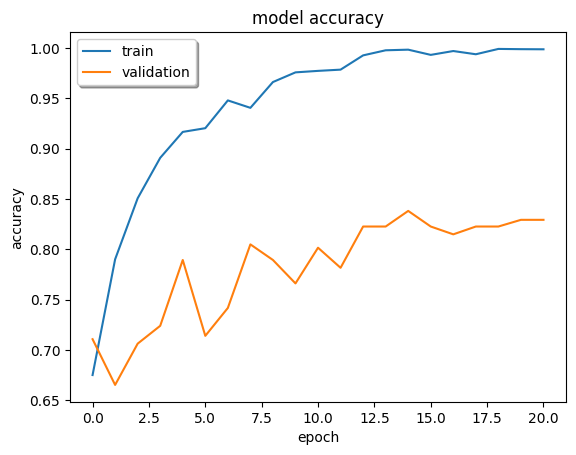

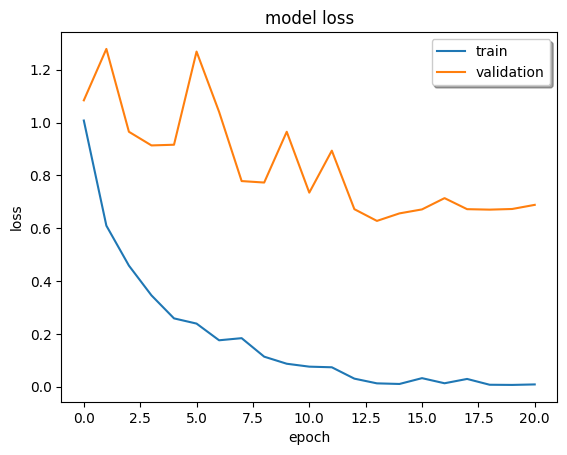

In [ ]:
# summarize history for accuracy
plt.plot(historyXcept.history['accuracy'])
plt.plot(historyXcept.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left', shadow = True)
plt.show()
# summarize history for loss
plt.plot(historyXcept.history['loss'])
plt.plot(historyXcept.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best', shadow = True)
plt.show()

In [ ]:
# Make predictions
predictions = model.predict_generator(x_test, verbose=1)

32/32 [==============================] - 4s 92ms/step


In [ ]:
predictions

array([[6.69175684e-01, 3.07983637e-01, 9.79778077e-03, ...,
        5.32336300e-03, 1.52692990e-03, 4.38005663e-03],
       [9.97630954e-01, 9.52071801e-04, 6.58244884e-04, ...,
        1.92565945e-04, 1.19521654e-04, 3.18003935e-04],
       [9.94380772e-01, 1.50798867e-03, 2.32752902e-03, ...,
        4.09835979e-04, 3.23717715e-04, 6.71995105e-04],
       ...,
       [9.92058694e-01, 2.74916622e-03, 1.75618322e-03, ...,
        1.00557110e-03, 5.80732478e-04, 1.12048653e-03],
       [1.39126857e-03, 1.03772781e-03, 9.97313298e-04, ...,
        2.25732056e-03, 4.28071740e-04, 7.52917840e-04],
       [8.96271877e-03, 4.29543287e-01, 5.32881796e-01, ...,
        1.31146293e-02, 5.68142394e-03, 5.25698718e-03]], dtype=float32)

In [ ]:
# Convert predicted values from an array to a Dataframe and round up to 4 decimal place
# For each row there are predicted % for each of the classes 0 t0 6
pred = np.around(pd.DataFrame(predictions), 4)
pred

,0,1,2,3,4,5,6
0,0.6692,0.3080,0.0098,0.0018,0.0053,0.0015,0.0044
1,0.9976,0.0010,0.0007,0.0001,0.0002,0.0001,0.0003
2,0.9944,0.0015,0.0023,0.0004,0.0004,0.0003,0.0007
3,0.9808,0.0074,0.0029,0.0024,0.0030,0.0020,0.0017
4,0.9923,0.0031,0.0015,0.0007,0.0009,0.0006,0.0009
...,...,...,...,...,...,...,...
997,0.9629,0.0178,0.0158,0.0005,0.0014,0.0006,0.0010
998,0.9423,0.0406,0.0072,0.0015,0.0029,0.0022,0.0033
999,0.9921,0.0027,0.0018,0.0007,0.0010,0.0006,0.0011
1000,0.0014,0.0010,0.0010,0.9931,0.0023,0.0004,0.0008


In [ ]:
# Obtain the indice of the maximum value for each row
y_pred = np.argmax(predictions, axis = 1)
y_pred

array([0, 0, 0, ..., 0, 3, 2])

##### **Evaluating the Model**

In [ ]:
# Create the confusion matrix 
confusion_matrix(y_pred, y_idtest)

array([[630,  34,  16,   3,   0,   1,   2],
       [ 16,  65,  11,   4,   1,   1,   2],
       [ 11,   9,  72,   1,   5,   0,   0],
       [ 10,   2,   9,  42,   6,   0,   0],
       [  2,   1,   2,   1,  20,   0,   3],
       [  1,   0,   0,   0,   0,  12,   0],
       [  1,   0,   0,   0,   1,   0,   5]])

In [ ]:
# MAke a dataframe of the confusion Matrix
CMatrix = pd.DataFrame(confusion_matrix(y_pred, y_idtest), columns=lesion_names, index =lesion_names)

In [ ]:
CMatrix

,Melanocytic nevi,Melanoma,Benign keratosis-like lesions,Basal cell carcinoma,Actinic keratoses,Vascular lesions,Dermatofibroma
Melanocytic nevi,630,34,16,3,0,1,2
Melanoma,16,65,11,4,1,1,2
Benign keratosis-like lesions,11,9,72,1,5,0,0
Basal cell carcinoma,10,2,9,42,6,0,0
Actinic keratoses,2,1,2,1,20,0,3
Vascular lesions,1,0,0,0,0,12,0
Dermatofibroma,1,0,0,0,1,0,5


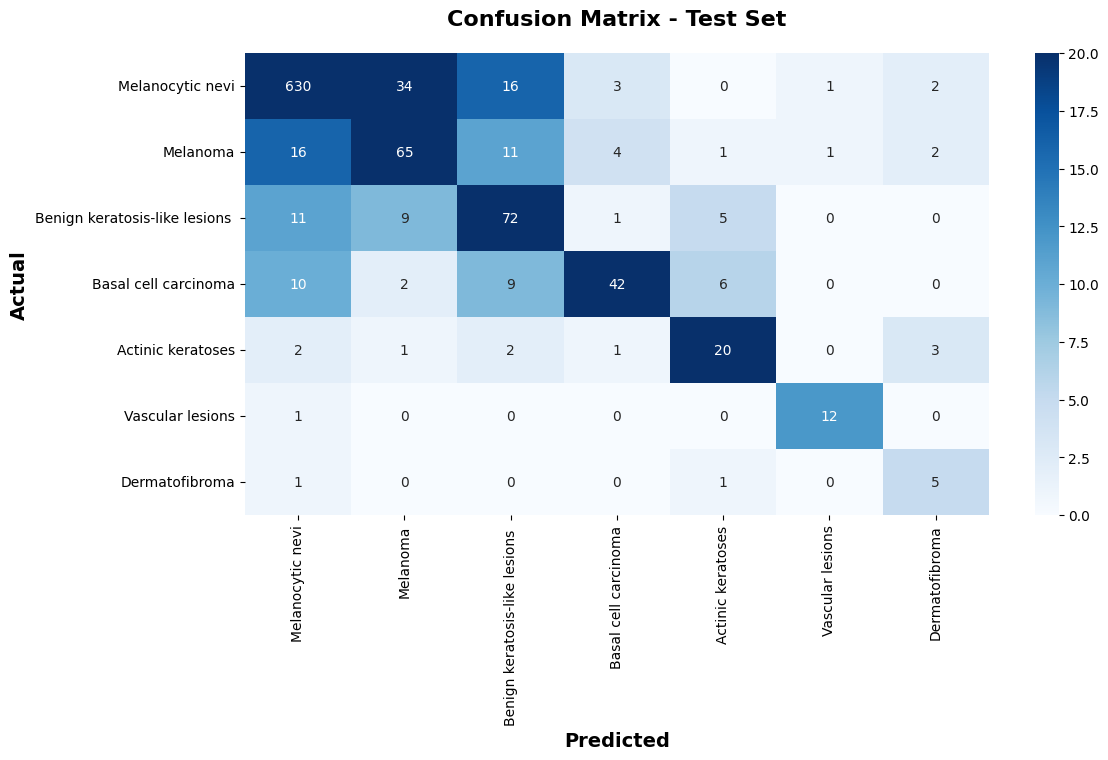

In [ ]:
# View the heatmap of the confusion matrix
plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 20,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =90);
ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')    
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

In [ ]:
# Determine the accuracy score of the model
accuracy_score(y_pred,y_idtest)

0.844311377245509

In [ ]:
print(classification_report(y_idtest,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       671
           1       0.65      0.59      0.62       111
           2       0.73      0.65      0.69       110
           3       0.61      0.82      0.70        51
           4       0.69      0.61      0.65        33
           5       0.92      0.86      0.89        14
           6       0.71      0.42      0.53        12

    accuracy                           0.84      1002
   macro avg       0.75      0.70      0.71      1002
weighted avg       0.84      0.84      0.84      1002



In [ ]:
# Show the accuracy of the model by class for each of the lesion in the dataset
class_accuracy = []

for i in range(7):
    acc_parz = round(np.mean(y_idtest[y_idtest == i] == y_pred[y_idtest == i]),2)
    lab_name = lesion_names[i]
    print('The Model accuracy for ',lab_name,'=',acc_parz)
    class_accuracy.append(acc_parz)

The Model accuracy for  Melanocytic nevi = 0.94
The Model accuracy for  Melanoma = 0.59
The Model accuracy for  Benign keratosis-like lesions  = 0.65
The Model accuracy for  Basal cell carcinoma = 0.82
The Model accuracy for  Actinic keratoses = 0.61
The Model accuracy for  Vascular lesions = 0.86
The Model accuracy for  Dermatofibroma = 0.42


In [ ]:
# Get the tabulated visualization of the Model's accuracy for each lesion 
acc_tab = pd.DataFrame(list(zip(lesion_ID_dict, class_accuracy)))
acc_tab.columns = ["Lesion", "Accuracy"]
acc_tab

,Lesion,Accuracy
0,nv,0.94
1,mel,0.59
2,bkl,0.65
3,bcc,0.82
4,akiec,0.61
5,vasc,0.86
6,df,0.42


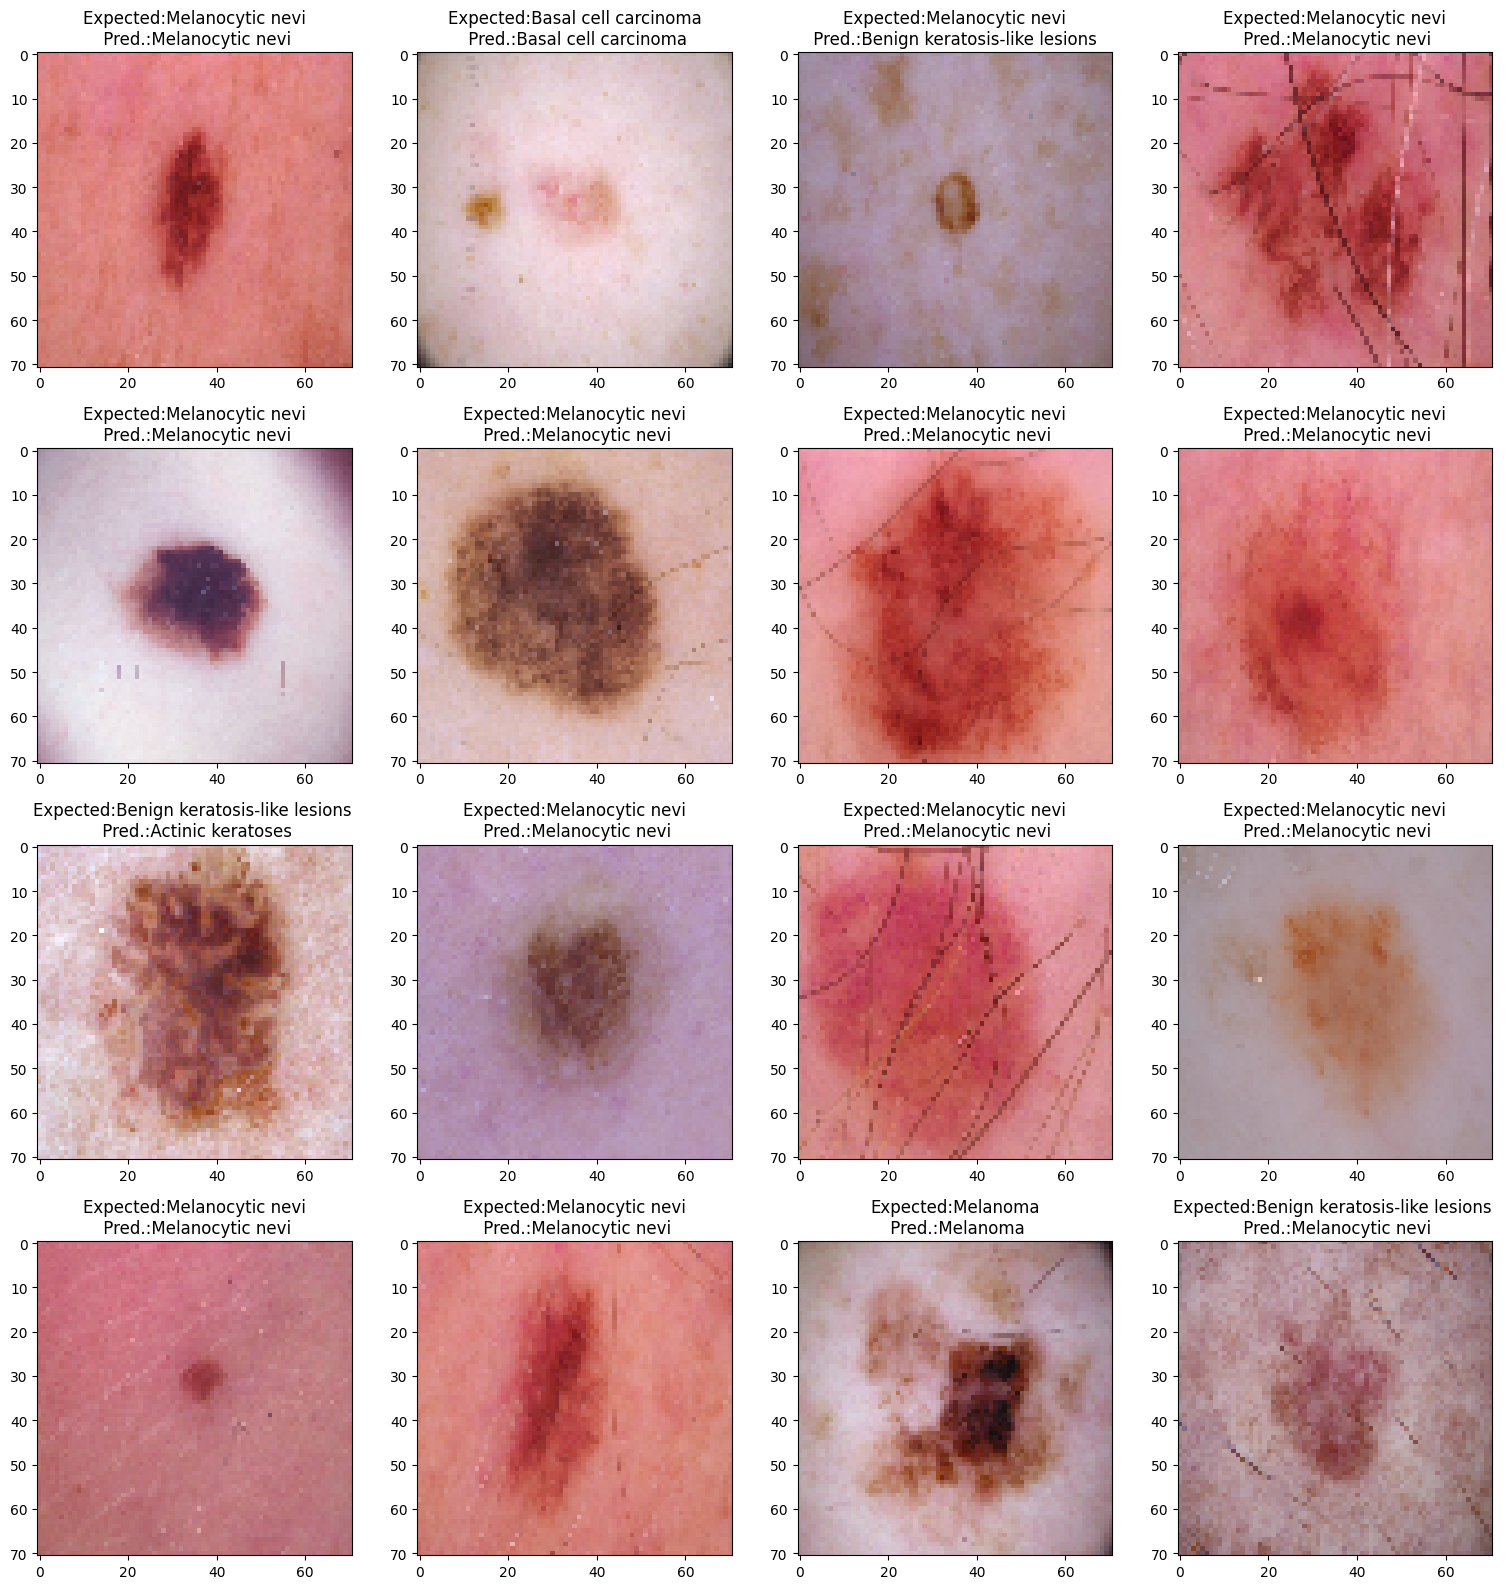

In [ ]:
# Show the Image plot along side the Label for Expected and Predicted lesion. 
plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    index = i+100
    plt.imshow(x_test[index,:,:,::-1])
    label_exp = lesion_names[y_idtest[index]]  #expected label
    label_pred = lesion_names[y_pred[index]]  #predicted label
    #label_pred_prob = round(np.max(y_pred_prob[index])*100)
    plt.title('Expected:'+str(label_exp)+'\n Pred.:'+str(label_pred))  
    plt.ylabel('')
    plt.tight_layout()
    plt.savefig('final_figure.png',dpi=300)
plt.show()

#### **Xception model with Attention**

In [ ]:
# Define the input
input_shape = (71, 71, 3)

# Define the number of classes
num_classes = 7

In [ ]:
# Defining base model using Xception module from Keras
from keras.applications import Xception

training_shape = (71,71,3)
base_model = Xception(include_top=False,weights='imagenet',input_shape = training_shape)
for layer in base_model.layers:
    layer.trainable = True 

In [ ]:
base_model.output

<KerasTensor: shape=(None, 3, 3, 2048) dtype=float32 (created by layer 'block14_sepconv2_act')>

In [ ]:
#Adding layers at end
n_classes = 7
model = base_model.output


model = Dense(128)(model)
model = Dropout(0.5)(model)
model = BatchNormalization()(model)
model = Activation('relu')(model)

attention_layer = att()(model)
attention_layer = Flatten()(attention_layer)
attention_layer = Dropout(0.2)(attention_layer)
outputs=Dense(n_classes, trainable=True, activation="softmax")(attention_layer)
model=Model(base_model.input,outputs)
model.compile(loss='categorical_crossentropy', optimizer= "adam", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 71, 71, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 35, 35, 32)   864         ['input_4[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 35, 35, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                                  
 block1_conv1_act (Activation)  (None, 35, 35, 32)   0           ['block1_conv1_bn[0][0]']  

In [ ]:
#Training our Model
#epochs = 40
history = model.fit(x_train,
                     y_train, 
                     epochs=40, 
                     batch_size=90, 
                     class_weight = class_weights, 
                     validation_data=(x_val, y_val),
                     callbacks=callbacks_list)

Epoch 1/40
91/91 [==============================] - ETA: 0s - loss: 0.0222 - accuracy: 0.9917
Epoch 1: val_accuracy did not improve from 0.83814
91/91 [==============================] - 80s 888ms/step - loss: 0.0222 - accuracy: 0.9917 - val_loss: 0.8737 - val_accuracy: 0.8315 - lr: 1.0000e-04
Epoch 2/40
91/91 [==============================] - ETA: 0s - loss: 0.0290 - accuracy: 0.9917
Epoch 2: val_accuracy did not improve from 0.83814
91/91 [==============================] - 88s 976ms/step - loss: 0.0290 - accuracy: 0.9917 - val_loss: 0.8755 - val_accuracy: 0.8271 - lr: 1.0000e-04
Epoch 3/40
91/91 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9908
Epoch 3: val_accuracy did not improve from 0.83814
91/91 [==============================] - 91s 1s/step - loss: 0.0435 - accuracy: 0.9908 - val_loss: 0.8975 - val_accuracy: 0.8259 - lr: 1.0000e-04
Epoch 4/40
91/91 [==============================] - ETA: 0s - loss: 0.0282 - accuracy: 0.9920
Epoch 4: val_accuracy did n

91/91 [==============================] - 114s 1s/step - loss: 0.0093 - accuracy: 0.9967 - val_loss: 0.8841 - val_accuracy: 0.8392 - lr: 1.0000e-04
Epoch 11/40
91/91 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.9967
Epoch 11: val_accuracy did not improve from 0.83925
91/91 [==============================] - 89s 987ms/step - loss: 0.0093 - accuracy: 0.9967 - val_loss: 0.8939 - val_accuracy: 0.8359 - lr: 1.0000e-04
Epoch 12/40
91/91 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9972
Epoch 12: val_accuracy did not improve from 0.83925
91/91 [==============================] - 91s 1s/step - loss: 0.0066 - accuracy: 0.9972 - val_loss: 0.8948 - val_accuracy: 0.8370 - lr: 1.0000e-04
Epoch 13/40
90/91 [============================>.] - ETA: 0s - loss: 0.0074 - accuracy: 0.9970
Epoch 13: val_accuracy did not improve from 0.83925
91/91 [==============================] - 91s 1s/step - loss: 0.0122 - accuracy: 0.9969 - val_loss: 0.9410 - val_accur

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,0.022225,0.991740,0.873746,0.831486,0.000100
1,0.028982,0.991740,0.875512,0.827051,0.000100
2,0.043538,0.990753,0.897474,0.825942,0.000100
3,0.028231,0.991986,0.872161,0.834812,0.000100
4,0.017117,0.994452,0.897601,0.831486,0.000100
5,0.019163,0.993836,0.851515,0.835920,0.000100
6,0.011505,0.995192,0.858516,0.838137,0.000100
7,0.029198,0.993219,0.881182,0.830377,0.000100
8,0.015478,0.994822,0.899698,0.834812,0.000100
9,0.009271,0.996671,0.884089,0.839246,0.000100


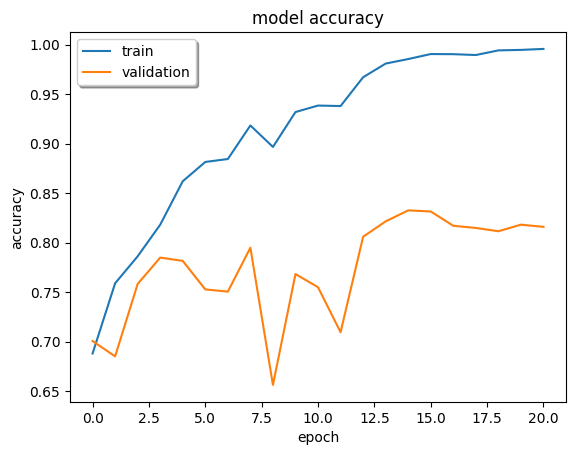

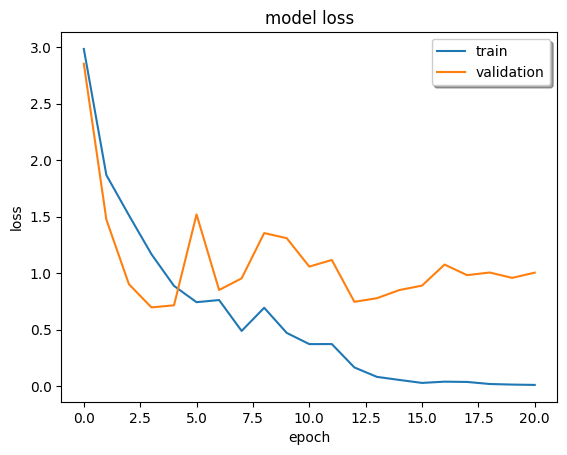

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left', shadow = True)
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best', shadow = True)
plt.show()

In [ ]:
# Make predictions
predictions_att = model.predict_generator(x_test, verbose=1)

32/32 [==============================] - 3s 44ms/step


In [ ]:
# Convert predicted values from an array to a Dataframe and round up to 4 decimal place
# For each row there are predicted % for each of the classes 0 t0 6
pred_att = np.around(pd.DataFrame(predictions_att), 4)
pred_att

,0,1,2,3,4,5,6
0,0.9999,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9974,0.0001,0.0023,0.0000,0.0000,0.0001,0.0001
2,0.9997,0.0001,0.0000,0.0001,0.0000,0.0001,0.0000
3,0.9998,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000
4,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...
997,0.0599,0.6857,0.2387,0.0050,0.0055,0.0033,0.0017
998,0.9808,0.0189,0.0002,0.0000,0.0000,0.0001,0.0000
999,0.9998,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000
1000,0.0001,0.0002,0.0002,0.9990,0.0002,0.0004,0.0001


In [ ]:
# Obtain the indice of the maximum value for each row
y_pred_att = np.argmax(predictions_att, axis = 1)
y_pred_att

array([0, 0, 0, ..., 0, 3, 1])

In [ ]:
# Create the confusion matrix 
confusion_matrix(y_pred_att, y_idtest)

array([[638,  43,  27,   5,   1,   2,   2],
       [ 15,  54,  16,   3,   0,   3,   1],
       [ 15,   7,  59,   0,   6,   0,   0],
       [  2,   3,   7,  41,   7,   2,   0],
       [  1,   4,   1,   2,  18,   0,   2],
       [  0,   0,   0,   0,   0,   7,   0],
       [  0,   0,   0,   0,   1,   0,   7]])

In [ ]:
print(classification_report(y_idtest,y_pred_att))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       671
           1       0.59      0.49      0.53       111
           2       0.68      0.54      0.60       110
           3       0.66      0.80      0.73        51
           4       0.64      0.55      0.59        33
           5       1.00      0.50      0.67        14
           6       0.88      0.58      0.70        12

    accuracy                           0.82      1002
   macro avg       0.76      0.63      0.68      1002
weighted avg       0.81      0.82      0.81      1002



In [ ]:
# Show the accuracy of the model by class for each of the lesion in the dataset
class_accuracy_att = []

for i in range(7):
    acc = round(np.mean(y_idtest[y_idtest == i] == y_pred_att[y_idtest == i]),2)
    lab_name = lesion_names[i]
    print('The Model accuracy for ',lab_name,'=',acc)
    class_accuracy_att.append(acc)

The Model accuracy for  Melanocytic nevi = 0.95
The Model accuracy for  Melanoma = 0.49
The Model accuracy for  Benign keratosis-like lesions  = 0.54
The Model accuracy for  Basal cell carcinoma = 0.8
The Model accuracy for  Actinic keratoses = 0.55
The Model accuracy for  Vascular lesions = 0.5
The Model accuracy for  Dermatofibroma = 0.58


In [ ]:
class_accuracy_att

[0.95, 0.49, 0.54, 0.8, 0.55, 0.5, 0.58]

In [ ]:
# Get the tabulated visualization of the Model's accuracy for each lesion 
acc_tab = pd.DataFrame(list(zip(lesion_ID_dict, class_accuracy_att)))
acc_tab.columns = ["Lesion", "Accuracy"]
acc_tab

,Lesion,Accuracy
0,nv,0.95
1,mel,0.49
2,bkl,0.54
3,bcc,0.80
4,akiec,0.55
5,vasc,0.50
6,df,0.58


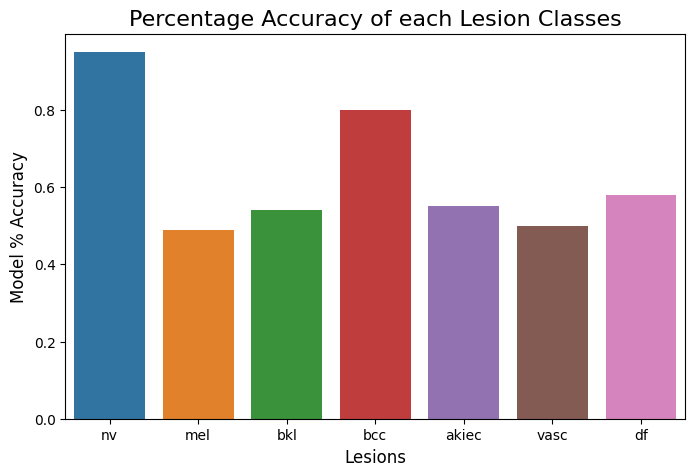

In [ ]:
# Visualise the graphical representation of the % Accuracy of the Model
plt.figure(figsize = (8, 5))
sns.barplot(data=acc_tab, x="Lesion", y= "Accuracy", hue=None)
plt.xlabel('Lesions', size=12)
plt.ylabel('Model % Accuracy', size=12)
plt.title('Percentage Accuracy of each Lesion Classes', size=16)
plt.show()

In [ ]:
# Visualize the Image and it's predictions 
plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    index = i+100
    plt.imshow(x_test[index,:,:,::-1])
    label_exp = lesion_names[y_idtest[index]]  #expected label
    label_pred = lesion_names[y_pred_att[index]]  #predicted label
    #label_pred_prob = round(np.max(y_pred_prob[index])*100)
    plt.title('Expected:'+str(label_exp)+'\n Pred.:'+str(label_pred))  
    plt.ylabel('')
    plt.tight_layout()
    plt.savefig('final_figure.png',dpi=300)
plt.show()

#### **With focal loss**

In [ ]:
# Define the focal loss function
def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_func(y_true, y_pred):
        pt = y_pred * y_true + (1 - y_pred) * (1 - y_true)
        w = alpha * y_true + (1 - alpha) * (1 - y_true)
        loss = -K.sum(w * K.pow(1 - pt, gamma) * K.log(pt))
        return loss
    return focal_loss_func

In [ ]:
# Define the input
input_shape = (71, 71, 3)

# Define the number of classes
num_classes = 7

In [ ]:
# Defining base model using Xception module from Keras
from keras.applications import Xception

training_shape = (71,71,3)
base_model = Xception(include_top=False,weights='imagenet',input_shape = training_shape)
for layer in base_model.layers:
    layer.trainable = True 

In [ ]:
#Adding layers at end
n_classes = 7
model = base_model.output


model = Dense(128)(model)
model = Dropout(0.5)(model)
model = BatchNormalization()(model)
model = Activation('relu')(model)

attention_layer = att()(model)
attention_layer = Flatten()(attention_layer)
attention_layer = Dropout(0.2)(attention_layer)
outputs=Dense(n_classes, trainable=True, activation="softmax")(attention_layer)
model=Model(base_model.input,outputs)
model.compile(loss='categorical_crossentropy', optimizer= "adam", metrics=['accuracy'])

In [ ]:
# Compile the model with the class-weighted and focal loss functions
model.compile(optimizer='adam',
              loss=focal_loss(),
              metrics=['accuracy'],
              sample_weight_mode='temporal')

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 71, 71, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 35, 35, 32)   864         ['input_5[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 35, 35, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                                  
 block1_conv1_act (Activation)  (None, 35, 35, 32)   0           ['block1_conv1_bn[0][0]']  

In [ ]:
#Training our Model
#epochs = 40
history = model.fit(x_train,
                     y_train, 
                     epochs=20, 
                     batch_size=90, 
                     #class_weight=class_weights, 
                     validation_data=(x_val, y_val),
                     callbacks=callbacks_list)

Epoch 1/20
91/91 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 1.0000
Epoch 1: val_accuracy did not improve from 0.85144
91/91 [==============================] - 96s 1s/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 22.6971 - val_accuracy: 0.8481 - lr: 3.1623e-06
Epoch 2/20
90/91 [============================>.] - ETA: 0s - loss: 0.0055 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 0.85144
91/91 [==============================] - 41s 450ms/step - loss: 0.0124 - accuracy: 0.9998 - val_loss: 22.7387 - val_accuracy: 0.8503 - lr: 3.1623e-06
Epoch 3/20
90/91 [============================>.] - ETA: 0s - loss: 0.0072 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.85144
91/91 [==============================] - 24s 263ms/step - loss: 0.0075 - accuracy: 0.9999 - val_loss: 22.6855 - val_accuracy: 0.8492 - lr: 3.1623e-06
Epoch 4/20
90/91 [============================>.] - ETA: 0s - loss: 0.0066 - accuracy: 1.0000
Epoch 4: val_accuracy di

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,59.828056,0.713476,62.979450,0.670732,0.001000
1,42.515926,0.783134,26.502693,0.650776,0.001000
2,34.817081,0.832450,39.533035,0.705100,0.001000
3,30.916925,0.855135,14.954566,0.741685,0.001000
4,24.959627,0.887314,13.145146,0.763858,0.001000
5,19.822405,0.912465,19.798269,0.750554,0.001000
6,18.003147,0.921341,19.631035,0.712860,0.001000
7,13.946245,0.940698,29.894869,0.759423,0.001000
8,12.913180,0.943657,21.046814,0.757206,0.001000
9,4.739606,0.982000,17.084734,0.824834,0.000316


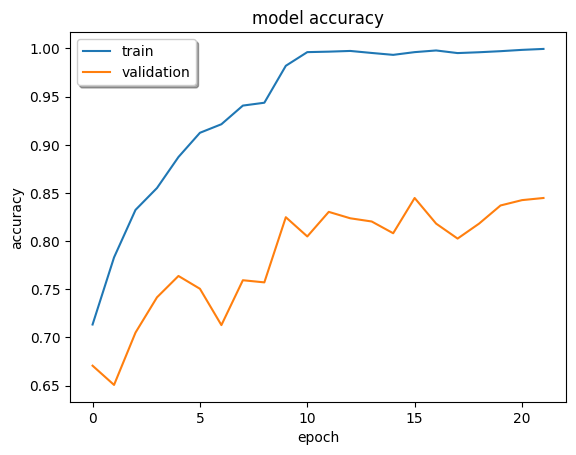

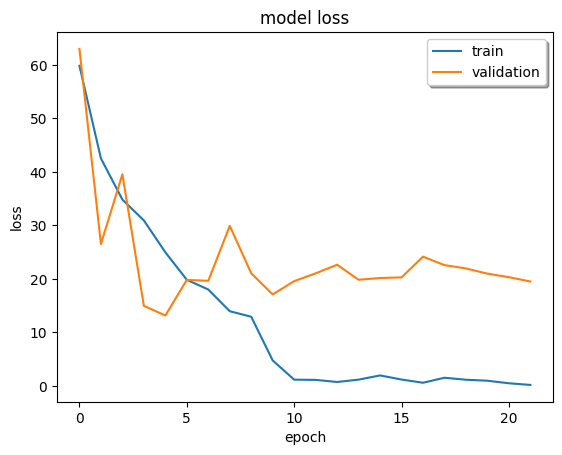

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left', shadow = True)
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best', shadow = True)
plt.show()

In [ ]:
# Make predictions
predictions_att = model.predict_generator(x_test, verbose=1)

32/32 [==============================] - 5s 141ms/step


In [ ]:
# Convert predicted values from an array to a Dataframe and round up to 4 decimal place
# For each row there are predicted % for each of the classes 0 t0 6
pred_att = np.around(pd.DataFrame(predictions_att), 4)
pred_att

,0,1,2,3,4,5,6
0,0.9444,0.0321,0.0107,0.0033,0.0032,0.0049,0.0014
1,0.9484,0.0195,0.0127,0.0058,0.0039,0.0076,0.0021
2,0.9734,0.0070,0.0072,0.0037,0.0028,0.0044,0.0016
3,0.9493,0.0130,0.0164,0.0074,0.0054,0.0055,0.0028
4,0.9760,0.0044,0.0042,0.0045,0.0022,0.0065,0.0023
...,...,...,...,...,...,...,...
997,0.0493,0.9027,0.0314,0.0021,0.0098,0.0029,0.0017
998,0.6130,0.2498,0.0860,0.0123,0.0159,0.0172,0.0058
999,0.9825,0.0032,0.0047,0.0026,0.0022,0.0033,0.0017
1000,0.2712,0.0898,0.0202,0.5424,0.0251,0.0228,0.0286


In [ ]:
# Obtain the indice of the maximum value for each row
y_pred_att = np.argmax(predictions_att, axis = 1)
y_pred_att

array([0, 0, 0, ..., 0, 3, 2])

In [ ]:
# Create the confusion matrix 
confusion_matrix(y_pred_att, y_idtest)

array([[637,  45,  25,   4,   3,   1,   2],
       [ 11,  58,  12,   5,   1,   0,   2],
       [ 16,   8,  68,   2,   2,   0,   0],
       [  1,   0,   2,  36,   4,   0,   1],
       [  3,   0,   3,   3,  21,   0,   1],
       [  3,   0,   0,   0,   1,  13,   0],
       [  0,   0,   0,   1,   1,   0,   6]])

In [ ]:
print(classification_report(y_idtest,y_pred_att))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       671
           1       0.65      0.52      0.58       111
           2       0.71      0.62      0.66       110
           3       0.82      0.71      0.76        51
           4       0.68      0.64      0.66        33
           5       0.76      0.93      0.84        14
           6       0.75      0.50      0.60        12

    accuracy                           0.84      1002
   macro avg       0.75      0.69      0.72      1002
weighted avg       0.83      0.84      0.83      1002



In [ ]:
# Show the accuracy of the model by class for each of the lesion in the dataset
class_accuracy_att = []

for i in range(7):
    acc = round(np.mean(y_idtest[y_idtest == i] == y_pred_att[y_idtest == i]),2)
    lab_name = lesion_names[i]
    print('The Model accuracy for ',lab_name,'=',acc)
    class_accuracy_att.append(acc)

The Model accuracy for  Melanocytic nevi = 0.95
The Model accuracy for  Melanoma = 0.52
The Model accuracy for  Benign keratosis-like lesions  = 0.62
The Model accuracy for  Basal cell carcinoma = 0.71
The Model accuracy for  Actinic keratoses = 0.64
The Model accuracy for  Vascular lesions = 0.93
The Model accuracy for  Dermatofibroma = 0.5


In [ ]:
class_accuracy_att

[0.95, 0.52, 0.62, 0.71, 0.64, 0.93, 0.5]

In [ ]:
# Determine the accuracy score of the modelCNN
accuracy_score(y_pred_att,y_idtest)

0.8373253493013972

In [ ]:
# Get the tabulated visualization of the Model's accuracy for each lesion 
acc_tab = pd.DataFrame(list(zip(lesion_ID_dict, class_accuracy_att)))
acc_tab.columns = ["Lesion", "Accuracy"]
acc_tab

In [ ]:
# Visualise the graphical representation of the % Accuracy of the Model
plt.figure(figsize = (8, 5))
sns.barplot(data=acc_tab, x="Lesion", y= "Accuracy", hue=None)
plt.xlabel('Lesions', size=12)
plt.ylabel('Model % Accuracy', size=12)
plt.title('Percentage Accuracy of each Lesion Classes', size=16)
plt.show()

In [ ]:
# Visualize the Image and it's predictions 
plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    index = i+100
    plt.imshow(x_test[index,:,:,::-1])
    label_exp = lesion_names[y_idtest[index]]  #expected label
    label_pred = lesion_names[y_pred_att[index]]  #predicted label
    #label_pred_prob = round(np.max(y_pred_prob[index])*100)
    plt.title('Expected:'+str(label_exp)+'\n Pred.:'+str(label_pred))  
    plt.ylabel('')
    plt.tight_layout()
    plt.savefig('final_figure.png',dpi=300)
plt.show()